<a href="https://colab.research.google.com/github/Dinarque/INALCO_Inalco_M2_langage_de_scripts_2024_eleves/blob/main/TP/TP2_la_chasse_au_papyrus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TP2 : La chasse au papyrus

  Internet regorge de bases de données intéressantes, surtout pour les linguistes et les humanités numériques. En effet, ils mettent souvent en ligne des bases de données spécialisées permettant (gratuitement ou non) d'explorer une collection particulière. Si la base de donnée est hébergée sur le site et naviguable, on ne peut malheureusement pas en faire une exploration quantitative puisque les sites n'offrent pas l'option de télécharger l'ensemble des données. De plus on est pas forcément intéressé par toute la collection ni par toutes les métadonnées disponibles pour chaque document.


Heureusement, python est là pour nous aider !

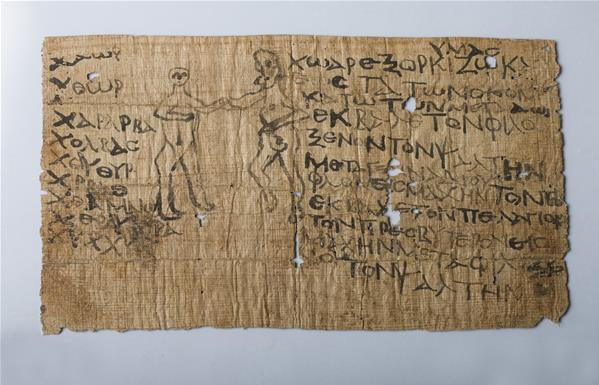

Image issue de https://antiquities.bibalex.org/Collection/Detail.aspx?lang=fr&a=508

L'objectif de ce TP est de collecter, stocker et analyser une collection de papyri grecs. Ce sera l'occasion de voir comment on peut utiliser les librairies de data science actuelles pour observer et analyser un dataset original

**Objectifs :**

1) Résiver les techniques de web scraping pour voir comment collecter un dataset:
* déduire la structure des url à regarder
* télécharger les pages HTML
* regarder la structure de la page et utiliser un parser HTML pour extraire les données

2) stocker les données sous un format csv. Utiliser pandas pour les analyser

3) construire des visualisations intéressantes du dataset

4) gérer le texte grec, son encodage, les outils TAL pour le traiter

5) utiliser streamlit, une librairie intuitive pour créer un front permettant d'explorer la collection de papyri.

**NB : LE TP EST A REALISER DANS DES FICHIERS PY ISOLES ET PAS SUR LE NOTEBOOK **

Le rendu prendra la forme d'une archive contenant 3 fichiers .py ainsi qu'un fichier requirements.txt

# I) Web scraping et collecte de la base de données des papyrus. /6

L'objectif de ce TP est d'analyser une collection de papyri grecs particulière.

Nous nous intéresserons à une partie de la collection préservée sur le site trismegistos.

https://www.trismegistos.org/

Nous ne nous intéresserong qu'à un nombre limité de papyri dont la liste est fournie en annexe (fichier papyrus_metadata.csv)



# 1)Collecte des URL

 A partir de la liste des papyri à étudier, générez la liste des url à crawler. Pour cela parcourez le site pour comprendre la structure des url donnant accès à un papyrus.

In [1]:
import pandas as pd

# Charger la liste des IDs depuis le fichier CSV
csv_file = './papyrus_metadata.csv'  # Chemin vers le fichier avec la liste des IDs
df = pd.read_csv(csv_file)

# Générer les URLs sans le préfixe "TM"
base_url = "https://www.trismegistos.org/text/"
urls = [base_url + str(id).replace("TM", "") for id in df['ID']]

# Afficher ou sauvegarder la liste des URLs
for url in urls:
    print(url)

# Sauvegarder dans un fichier texte
with open('urls_papyrus.txt', 'w') as f:
    for url in urls:
        f.write(url + '\n')

print(f"{len(urls)} URLs générées et sauvegardées dans 'urls_papyrus.txt'.")


https://www.trismegistos.org/text/58376
https://www.trismegistos.org/text/61011
https://www.trismegistos.org/text/61596
https://www.trismegistos.org/text/61072
https://www.trismegistos.org/text/19028
https://www.trismegistos.org/text/19001
https://www.trismegistos.org/text/45294
https://www.trismegistos.org/text/38431
https://www.trismegistos.org/text/38430
https://www.trismegistos.org/text/38429
https://www.trismegistos.org/text/38428
https://www.trismegistos.org/text/36991
https://www.trismegistos.org/text/36984
https://www.trismegistos.org/text/36960
https://www.trismegistos.org/text/36826
https://www.trismegistos.org/text/36825
https://www.trismegistos.org/text/36824
https://www.trismegistos.org/text/36823
https://www.trismegistos.org/text/36822
https://www.trismegistos.org/text/36821
https://www.trismegistos.org/text/36820
https://www.trismegistos.org/text/36819
https://www.trismegistos.org/text/36958
https://www.trismegistos.org/text/36818
https://www.trismegistos.org/text/36957


# 2) Scraping d'une page


Etudiez la structure du HTML des pages présentant un papyrus

https://www.trismegistos.org/text/100

écrire une fonciton scrap_papyrus() prenant en entrée une url et retourne un dictionnaire contenant les informations suivantes sur le papyrus:
* Date
* Provenance
* Language/script
* Material
* Content
* Publications
* Collections
* Archive
* Le texte principal (à formater)
* La liste des noms de personnes
* La liste des noms de lieux
* La liste des irrégularités textuelles

BONUS : Capturez aussi le  numéro du champ TM Geo
servez vous de ces numéros pour capturer le fichier geo json du lieu, qui se trouve sur les pages des lieux comme par exemple https://www.trismegistos.org/place/2982 .



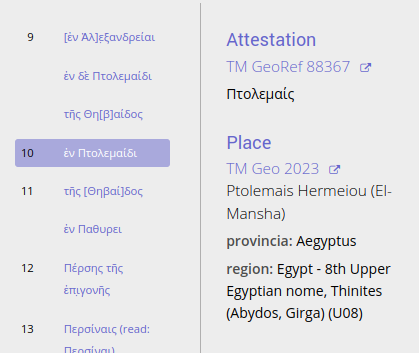

tester ce script sur **une** url au hasard pour vérifier qu'il fonctionne.

In [1]:
import requests
from bs4 import BeautifulSoup

def scrap_papyrus(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    papyrus_data = {
        'Date': soup.find('span', text='Date:').find_next_sibling(text=True).strip() if soup.find('span', text='Date:') else None,
        'Provenance': soup.find('span', text='Provenance:').find_next_sibling('a').text if soup.find('span', text='Provenance:') else None,
        'Language/script': soup.find('span', text='Language/script:').find_next_sibling('a').text if soup.find('span', text='Language/script:') else None,
        'Material': soup.find('span', text='Material:').find_next_sibling('a').text if soup.find('span', text='Material:') else None,
        'Content': soup.find('span', text='Content (beta!):').find_next_sibling(text=True).strip() if soup.find('span', text='Content (beta!):') else None,
        'Publications': [pub.text for pub in soup.select('#text-publs p')],
        'Collections': [coll.text for coll in soup.select('#text-coll p')],
        'Archive': soup.find('div', id='text-arch').get_text(strip=True) if soup.find('div', id='text-arch') else None,
        'Texte principal': ' '.join([a.text for a in soup.select('#words-list a')]),
        'Personnes': [a.text for a in soup.select('#people-header a')],
        'Lieux': [a.text for a in soup.select('#places-header a')],
        'Irrégularités textuelles': [a.text for a in soup.select('#textirr-header a')]
    }
    
    # BONUS: Extraction du numéro TM Geo pour capturer le fichier JSON
    provenance_url = soup.find('a', href=lambda x: x and '/place/' in x)
    if provenance_url:
        geo_number = provenance_url['href'].split('/')[-1]
        papyrus_data['TM Geo'] = geo_number
        papyrus_data['Geo JSON'] = f'https://www.trismegistos.org/place/{geo_number}'

    return papyrus_data

# Exemple d'utilisation
url = "https://www.trismegistos.org/text/100"
print(scrap_papyrus(url))


{'Date': '', 'Provenance': 'Pathyris (Gebelein)', 'Language/script': 'Greek', 'Material': 'papyrus', 'Content': 'Contract: cession', 'Publications': ['P. Strasb. Gr. 2 83  (Preisigke, Friedrich - 1920) [default] ', 'Other bibliography: BL 2.2, 1933'], 'Collections': ['→ Strasbourg, Bibliothèque Nationale P. gr. 65'], 'Archive': 'ArchivePeteharsemtheus son of Panebchounis', 'Texte principal': 'Papyri.info   [βασιλ]ευόντωνparticiple.pl.pres.act.masc.gen of βασιλεύω ("to be king")→ square brackets [ ] embrace text that is lost but has been reconstructed  β̣[α]σιλίσσηςnoun.sg.fem.gen of βασίλισσα ("queen")→ square brackets [ ] embrace text that is lost but has been reconstructed→ ḍọṭṭẹḍ letters indicate characters that are legible in context only  κ[αὶ]coordinator of καί ("and")→ square brackets [ ] embrace text that is lost but has been reconstructed  βασιλέωςnoun.sg.masc.gen of βασιλεύς ("king")  θεῶνnoun.pl.masc.gen of θεός ("god")  ἔτουςnoun.sg.neut.gen of ἔτος ("year")  γnumeral

/tmp/ipykernel_19399/2559180091.py:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  'Date': soup.find('span', text='Date:').find_next_sibling(text=True).strip() if soup.find('span', text='Date:') else None,
/tmp/ipykernel_19399/2559180091.py:10: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  'Provenance': soup.find('span', text='Provenance:').find_next_sibling('a').text if soup.find('span', text='Provenance:') else None,
/tmp/ipykernel_19399/2559180091.py:11: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  'Language/script': soup.find('span', text='Language/script:').find_next_sibling('a').text if soup.find('span', text='Language/script:') else None,
/tmp/ipykernel_19399/2559180091.py:12: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  'Material': soup.find('span', text=

# 3) Scraping total

dans un fichier scraping.py écrire un programme qui:
* lit le fichier de papyri à scanner et en déduit la liste d'url à scraper
* scrape chaque url (cf 2) )
* stocke toutes ces informations dans un fichier .csv nommé papyri.csv

**N EXECUTEZ PAS CE CODE CAR IL METTRAIT 20mn A TOURNER ET QUE LE SCRAPING N EST PAS UNE ACTIVITE QUE LES SITES APPRECIENT. JE FOURNIRAI LE CSV POUR PASSER A LA PARTIE II**

à la rigueur, testez votre code sur un ensemble de 3 pages web et pas les 600...


# Cf. fichier scraping.py

In [ ]:
"""
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv

# Charger la liste des IDs depuis le fichier CSV et générer les URLs
def charger_urls(csv_file):
    df = pd.read_csv(csv_file)
    base_url = "https://www.trismegistos.org/text/"
    urls = [base_url + str(id).replace("TM", "") for id in df['ID']]
    return urls

# Scraper une page de papyrus
def scrap_papyrus(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    papyrus_data = {
        'URL': url,
        'Date': soup.find('span', text='Date:').find_next_sibling(text=True).strip() if soup.find('span', text='Date:') else None,
        'Provenance': soup.find('span', text='Provenance:').find_next_sibling('a').text if soup.find('span', text='Provenance:') else None,
        'Language/script': soup.find('span', text='Language/script:').find_next_sibling('a').text if soup.find('span', text='Language/script:') else None,
        'Material': soup.find('span', text='Material:').find_next_sibling('a').text if soup.find('span', text='Material:') else None,
        'Content': soup.find('span', text='Content (beta!):').find_next_sibling(text=True).strip() if soup.find('span', text='Content (beta!):') else None,
        'Publications': ' | '.join([pub.text for pub in soup.select('#text-publs p')]),
        'Collections': ' | '.join([coll.text for coll in soup.select('#text-coll p')]),
        'Archive': soup.find('div', id='text-arch').get_text(strip=True) if soup.find('div', id='text-arch') else None,
        'Texte principal': ' '.join([a.text for a in soup.select('#words-list a')]),
        'Personnes': ' | '.join([a.text for a in soup.select('#people-header a')]),
        'Lieux': ' | '.join([a.text for a in soup.select('#places-header a')]),
        'Irrégularités textuelles': ' | '.join([a.text for a in soup.select('#textirr-header a')])
    }
    
    # BONUS: Extraction du numéro TM Geo pour capturer le fichier JSON
    provenance_url = soup.find('a', href=lambda x: x and '/place/' in x)
    if provenance_url:
        geo_number = provenance_url['href'].split('/')[-1]
        papyrus_data['TM Geo'] = geo_number
        papyrus_data['Geo JSON'] = f'https://www.trismegistos.org/place/{geo_number}'

    return papyrus_data

# Fonction principale pour scrapper toutes les pages et sauvegarder dans un fichier CSV
def scraper_total(csv_input, csv_output):
    urls = charger_urls(csv_input)
    
    # Ouvrir le fichier CSV pour écrire les données
    with open(csv_output, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Entêtes pour le fichier CSV
        headers = [
            'URL', 'Date', 'Provenance', 'Language/script', 'Material', 'Content',
            'Publications', 'Collections', 'Archive', 'Texte principal', 
            'Personnes', 'Lieux', 'Irrégularités textuelles', 'TM Geo', 'Geo JSON'
        ]
        writer.writerow(headers)
        
        # Scraper chaque URL et écrire les données dans le CSV
        for url in urls:
            print(f"Scraping {url}")
            try:
                papyrus_data = scrap_papyrus(url)
                writer.writerow([papyrus_data.get(header, '') for header in headers])
            except Exception as e:
                print(f"Erreur lors du scraping de {url}: {e}")

    print(f"Scraping terminé. Les données ont été sauvegardées dans '{csv_output}'.")

# Exécuter le programme (utilisation : python scraping.py)
if __name__ == "__main__":
    csv_input = './papyrus_metadata.csv'  # Chemin du fichier avec la liste des IDs
    csv_output = 'papyri.csv'             # Fichier de sortie CSV
    scraper_total(csv_input, csv_output)

"""
# Exécuter le programme (exemple d'utilisation : python scraping.py input.csv output.csv)
"""
if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Scraper les informations des papyri et les stocker dans un fichier CSV.")
    parser.add_argument('csv_input', help="Chemin du fichier d'entrée CSV avec les IDs des papyri : par exemple, papyrus_metadata.csv")
    parser.add_argument('csv_output', help="Chemin du fichier de sortie CSV pour stocker les données scrapées : par exemple, papyri.csv")
    args = parser.parse_args()

    scraper_total(args.csv_input, args.csv_output)
"""

In [ ]:
"""
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import argparse
import re


# Charger la liste des IDs depuis le fichier CSV et générer les URLs
def charger_urls(csv_file):
    df = pd.read_csv(csv_file)
    base_url = "https://www.trismegistos.org/text/"
    urls = [base_url + str(id).replace("TM", "") for id in df['ID']]
    return urls


def scrap_papyrus(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extraction des informations du papyrus
    tm_id = "TM " + url.split('/')[-1]
    date_1 = soup.find('a').text.strip()
    date = soup.find('div', class_='division').text.strip().split(date_1)[-1].strip().replace("Date: ", "")
    #print(date)
    provenance = soup.find('span', text='Provenance:').find_next_sibling('a').text if soup.find('span', text='Provenance:') else None
    language_script = soup.find('span', text='Language/script:').find_next_sibling('a').text if soup.find('span', text='Language/script:') else None
    material = soup.find('span', text='Material:').find_next_sibling('a').text if soup.find('span', text='Material:') else None
    content = soup.find('span', text='Content (beta!):').find_next_sibling(text=True).strip() if soup.find('span', text='Content (beta!):') else None
    publications = ', '.join([pub.text for pub in soup.select('#text-publs p')])
    collections = ', '.join([coll.text for coll in soup.select('#text-coll p')])
    archive = soup.find('div', id='text-arch').get_text(strip=True) if soup.find('div', id='text-arch') else None
    texte_principal = ' '.join([a.text.replace("Papyri.info", "") for a in soup.select('#words-list a')]) if soup.select('#words-list a') else None

    # Extraction des noms de personnes, des noms de lieux et des irrégularités textuelles sous forme de liste de chaînes de caractères et de dictionnaire
    personnes = ', '.join([a.text for a in soup.select('#people-list a')]) if soup.select('#people-list a') else ""
    personnes_liste = personnes.split(", ")
    lieux_cles = ', '.join([a.text for a in soup.select('#places-list a')]) if soup.select('#places-list a') else ""
    lieux_cles_liste = lieux_cles.split(", ")
    #lieux_valeurs_liste = soup.find_all(string=lambda text: text and "getgeo(" in text)
    #print(lieux_valeurs_liste)
    #lieux_valeurs_numerique_liste = [re.sub(r'\D', '', valeur) for valeur in lieux_valeurs_liste]
    #lieux_dico = dict(zip(lieux_cles_liste, lieux_valeurs_numerique_liste))
    # Trouver toutes les chaînes contenant "getgeo(" et extraire l'ID numérique
    getgeo_values_liste = [re.search(r'getgeo\((\d+)\)', item['onclick']).group(1)
                    for item in soup.find_all('li', class_='item-large')
                    if 'onclick' in item.attrs and 'getgeo(' in item['onclick']]
    lieux_dico = dict(zip(lieux_cles_liste, getgeo_values_liste))
    irregularites_textuelles_liste = soup.find_all(string=lambda text: text and ": read " in text)

    # BONUS: Extraction du numéro TM Geo pour capturer le fichier JSON
    provenance_url = soup.find('a', href=lambda x: x and '/place/' in x)
    geo_number = provenance_url['href'].split('/')[-1] if provenance_url else None
    geo_json_url = f'https://www.trismegistos.org/place/{geo_number}' if geo_number else None

    papyrus_data = {
        'ID': tm_id,
        'Date': date,
        'Provenance': provenance,
        'Language/script': language_script,
        'Material': material,
        'Content': content,
        'Publications': publications,
        'Collections': collections,
        'Archive': archive,
        'Texte principal': texte_principal,
        'Personnes': personnes_liste,  # Liste des noms de personnes
        'Lieux': lieux_dico,          # Dictionnaire des noms de lieux et de leur ID de localisation
        'Irrégularités textuelles': irregularites_textuelles_liste, # Liste des irrégularités textuelles
        'TM Geo': geo_number,
        'Geo JSON': geo_json_url
    }

    # Remplacement des valeurs None par "nan" pour s'assurer qu'aucune valeur ne soit vide, afin de faciliter le traitement ultérieur des données
    for key, value in papyrus_data.items():
        if value is None:
            papyrus_data[key] = "nan"

    return papyrus_data


# Fonction principale pour scrapper toutes les pages et sauvegarder dans un fichier CSV
def scraper_total(csv_input, csv_output):
    urls = charger_urls(csv_input)

    # Ouvrir le fichier CSV pour écrire les données avec csv.DictWriter
    with open(csv_output, mode='w', newline='', encoding='utf-8') as file:
        # Entêtes pour le fichier CSV
        headers = [
            'ID', 'Date', 'Provenance', 'Language/script', 'Material', 'Content',
            'Publications', 'Collections', 'Archive', 'Texte principal',
            'Personnes', 'Lieux', 'Irrégularités textuelles', 'TM Geo', 'Geo JSON'
        ]
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()

        # Scraper chaque URL et écrire les données dans le CSV
        for url in urls:
            print(f"Scraping {url}")
            try:
                papyrus_data = scrap_papyrus(url)
                writer.writerow(papyrus_data)
            except Exception as e:
                print(f"Erreur lors du scraping de {url}: {e}")

    print(f"Scraping terminé. Les données ont été sauvegardées dans '{csv_output}'.")


# Exécuter le programme (exemple d'utilisation : python scraping.py input.csv output.csv)
if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Scraper les informations des papyri et les stocker dans un fichier CSV.")
    parser.add_argument('csv_input', help="Chemin du fichier d'entrée CSV avec les IDs des papyri")
    parser.add_argument('csv_output', help="Chemin du fichier de sortie CSV pour stocker les données scrapées")
    args = parser.parse_args()

    scraper_total(args.csv_input, args.csv_output)
"""

# II) Analyse du dataset /10



Dans cette partie, nous allons utiliser les librairies de datascience pour visualiser, analyser et enrichir le corpus que nous avons scrapé

Pour ne pas pénaliser un scraping imparfait et que je puisse vérifier plus facilement les résultats, vous allez tous télécharger le fichier "papyrus_corpus.csv".

Vous pouvez traitez cette partie du TP soit dans le notebook, soit dans un fichier nommé corpus_analysis.py qui devra s'exécuter correctement de A à Z, affichez les réponses avec un message explicite (print correctement f formatté) et les graphiques demandés (plt.show()) après chaque graphe)

# Je vais traiter cette partie dans le notebook car c'est beaucoup plus simple de visualiser tous les graphiques sur notebook ! 

In [ ]:
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le corpus de papyrus
def charger_corpus(fichier):
    df = pd.read_csv(fichier)
    print(f"Corpus chargé avec succès : {df.shape[0]} entrées.")
    return df

# Analyser les dates des papyrus
def analyser_dates(df):
    # Conversion des dates en datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Statistiques descriptives
    print(f"\nStatistiques descriptives sur les dates :\n{df['Date'].describe()}")
    
    # Graphique de la distribution des dates
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Date'].dt.year.dropna(), bins=30, kde=True)
    plt.title('Distribution des dates des papyrus')
    plt.xlabel('Année')
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Analyser la provenance des papyrus
def analyser_provenance(df):
    provenance_counts = df['Provenance'].value_counts().head(10)
    print(f"\nTop 10 des provenances :\n{provenance_counts}")

    # Graphique de la provenance
    plt.figure(figsize=(12, 6))
    sns.barplot(x=provenance_counts.index, y=provenance_counts.values, palette='viridis')
    plt.title('Top 10 des provenances des papyrus')
    plt.xlabel('Provenance')
    plt.ylabel('Nombre de papyrus')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Analyser les langues/script
def analyser_langues(df):
    langue_counts = df['Language/script'].value_counts().head(10)
    print(f"\nTop 10 des langues/script :\n{langue_counts}")

    # Graphique des langues/script
    plt.figure(figsize=(12, 6))
    sns.barplot(x=langue_counts.index, y=langue_counts.values, palette='coolwarm')
    plt.title('Top 10 des langues/script des papyrus')
    plt.xlabel('Langue/Script')
    plt.ylabel('Nombre de papyrus')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Fonction principale
def analyser_corpus():
    corpus_file = 'papyrus_corpus.csv'
    df = charger_corpus(corpus_file)

    analyser_dates(df)
    analyser_provenance(df)
    analyser_langues(df)

# Exécution du script
if __name__ == "__main__":
    analyser_corpus()
"""

# 4) Chargement et nettoyage du dataset

Il faut d'abord charger ce corpus et le nettoyer un peu:
* Charger le fichier csv dans un DataFrame
* Observer le dataset. Que dire des 4 premières lignes ?  Que faire ? Faites-le.
* Combien de textes n'ont pas été capturés pendant le scraping ? Comment le voit-on ? Enlevez-les
* Combien la collection compte-t elle de papyrus après nettoyage ?
* Trier la collection selon l'ID (ordre croissant)

In [ ]:
"""
import pandas as pd
import argparse

def charger_et_nettoyer_dataset(fichier_csv):
    # Charger le fichier CSV dans un DataFrame
    df = pd.read_csv(fichier_csv)

    # Observer les 4 premières lignes
    print("Voici les 4 premières lignes du dataset :")
    print(df.head())

    # Vérification des colonnes vides ou des données manquantes
    print("\nInformations sur le dataset :")
    print(df.info())

    # Compter les textes non capturés (lignes avec 'nan' dans la colonne 'ID')
    #textes_non_captures = df[df['ID'] == "nan"].shape[0]
    #print(f"\nNombre de textes non capturés pendant le scraping : {textes_non_captures}")

    # Enlever les textes non capturés
    #df_cleaned = df[df['ID'] != "nan"]

    # Compter le nombre de papyrus après nettoyage
    #nombre_papyrus = df_cleaned.shape[0]
    #print(f"Nombre de papyrus après nettoyage : {nombre_papyrus}")

    # Trier la collection selon l'ID (ordre croissant)
    #df_sorted = df_cleaned.sort_values(by='ID')

    #return df_sorted

if __name__ == "__main__":
    # Configurer le parser d'arguments
    parser = argparse.ArgumentParser(description="Charger et nettoyer le dataset de papyrus.")
    parser.add_argument('fichier_csv', help="Chemin du fichier CSV contenant les données de papyrus")
    args = parser.parse_args()

    # Charger et nettoyer le dataset
    dataset_nettoye = charger_et_nettoyer_dataset(args.fichier_csv)
    print("\nDataset après nettoyage et tri :")
    print(dataset_nettoye)

    
    
    
# Fonction principale
def analyser_corpus():
    corpus_file = 'papyrus_corpus.csv'
    df = charger_et_nettoyer_corpus(corpus_file)

    # Si vous voulez afficher les 4 premières lignes du dataset nettoyé
    print("\nAperçu des 4 premières lignes du dataset nettoyé :")
    print(df.head())

# Exécution du script
if __name__ == "__main__":
    analyser_corpus()
"""

In [ ]:
"""
import pandas as pd
import argparse

def charger_et_nettoyer_dataset(fichier_csv):
    # Charger le fichier CSV dans un DataFrame
    df = pd.read_csv(fichier_csv)

    # Observer les 4 premières lignes
    print("Voici les 4 premières lignes du dataset :")
    print(df.head())

    # Vérification des colonnes vides ou des données manquantes
    print("\nInformations sur le dataset :")
    print(df.info())

    # Compter les textes non capturés (lignes avec NaN dans la colonne 'Full Text')
    textes_non_captures = df[df['Full Text'].isna()].shape[0]
    print(f"\nNombre de textes non capturés pendant le scraping : {textes_non_captures}")

    # Enlever les textes non capturés
    df_cleaned = df.dropna(subset=['Full Text'])

    # Compter le nombre de papyrus après nettoyage
    nombre_papyrus = df_cleaned.shape[0]
    print(f"Nombre de papyrus après nettoyage : {nombre_papyrus}")
    print(df_cleaned)

    # Trier la collection selon l'ID (ordre croissant)
    df_sorted = df_cleaned.sort_values(by='ID')

    return df_sorted

if __name__ == "__main__":
    # Configurer le parser d'arguments
    parser = argparse.ArgumentParser(description="Charger et nettoyer le dataset de papyrus.")
    parser.add_argument('fichier_csv', help="Chemin du fichier CSV contenant les données de papyrus")
    args = parser.parse_args()

    # Charger et nettoyer le dataset
    dataset_nettoye = charger_et_nettoyer_dataset(args.fichier_csv)
    print("\nDataset après nettoyage et tri :")
    print(dataset_nettoye)
"""

In [1]:
import pandas as pd

def charger_et_nettoyer_dataset(fichier_csv):
    # Charger le fichier CSV dans un DataFrame
    df = pd.read_csv(fichier_csv)

    # Observer les 4 premières lignes
    print("Voici les 4 premières lignes du dataset :")
    print(df.head())
    print("="*100)
    print("Les 4 premières lignes n'ont pas de full text :  ce n'est pas intéressant pour nous...")
    print("On va donc les enlever !")
    print("="*100)

    # Vérification des colonnes vides ou des données manquantes
    print("\nInformations sur le dataset :")
    print(df.info())
    print("="*100)

    # Compter les textes non capturés (lignes avec NaN dans la colonne 'Full Text')
    textes_non_captures = df[df['Full Text'].isna()].shape[0]
    print(f"\nNombre de textes non capturés pendant le scraping (lignes avec NaN dans la colonne 'Full Text') : {textes_non_captures}")

    # Enlever les textes non capturés
    df_cleaned = df.dropna(subset=['Full Text'])

    # Compter le nombre de papyrus après nettoyage
    nombre_papyrus = df_cleaned.shape[0]
    print(f"Nombre de papyrus après nettoyage : {nombre_papyrus}")
    print("="*100)
    print("\nDataset après nettoyage :")
    print(df_cleaned)
    print("="*100)
    
    # Trier la collection selon l'ID (ordre croissant)
    df_sorted = df_cleaned.sort_values(by='ID')
    print("\nDataset trié selon l'ID (par ordre croissant) :")
    print(df_sorted)
    print("="*100)

    return df_sorted


# Définir le chemin du fichier CSV
fichier_csv = './papyrus_corpus.csv'  

# Charger et nettoyer le dataset
dataset_nettoye = charger_et_nettoyer_dataset(fichier_csv)


Voici les 4 premières lignes du dataset :
         ID                                    Authors / works  \
0  TM 58376                                                NaN   
1  TM 61011  Homerus,Ilias:2.379-2.382This link will bring ...   
2  TM 61596  Menander,Heros: hypothesis and title (epitomiz...   
3  TM 61072  Homerus,Ilias:2.494-2.519This link will bring ...   
4  TM 19028                                                NaN   

                                           Book form   Content (beta!)  \
0                                                NaN  funerary (human)   
1  codex (10 pages); columns per page: 2; highest...      school text?   
2  codex (17 fol.); columns per page: 1; highest ...               NaN   
3  codex; columns per page: 1; number of lines pe...       school text   
4                                                NaN    Contract: sale   

                                     Culture & genre  \
0                                                NaN   
1  l

#### Explications :
- Les 4 premières lignes n'ont pas de full text :  ce n'est pas intéressant pour nous... On va donc les enlever comme toutes les papyri qui n'ont pas de full text !
- Nombre de textes non capturés pendant le scraping (lignes avec NaN dans la colonne 'Full Text') : 120
- Nombre de papyrus après nettoyage : 459

# 5) Etude de corpus : genre, lieu et date


* Quelles sont les différents genre de texte que l'on a collecté ? La nomenclature de la colonne "Content (beta!) est un peu trop précise. Basez-vous sur le premier mot et créez un graphique.
* Affichez cela sous la forme d'un pie chart
* combien de papyri ont-ils été réutilisés ?

* D'où viennent les papyri ?  De même ne retenez que le nom de la ville. Faites un diagramme en barre cette fois.
* Qu'en concluez-vous ?

*Identifier la date d'écriture. Observez la catégorie des dates et nettoyez le texte pour regrouper ensemble les catégories pertinente
* Formattez les dates sous le format d'une date simple AD xxx
ou d'un intervalle AD xxx - xxx
* Utilisez ensuite ces valeurs discrètes ou intervalles pour construire un diagramme représentant la densité de papyri sur chaque année du dataset.
NB quand il y a plusieurs dates mentionnées dans la colonne on ne prendra en compte que la première
NB : il faudra transformer les bornes en intervalles continus.

NB Les graphes devraient ressembler à ça :



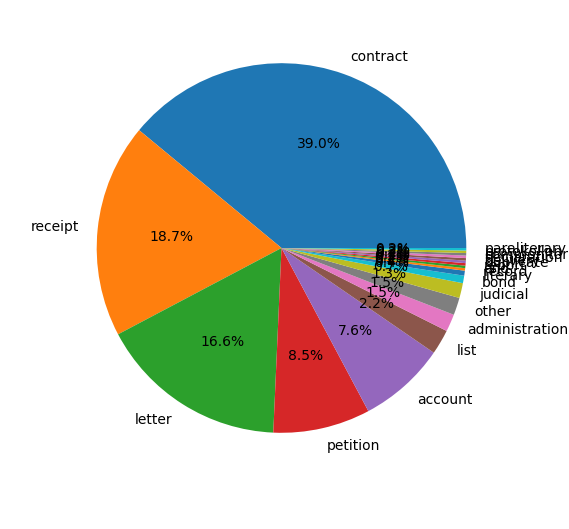

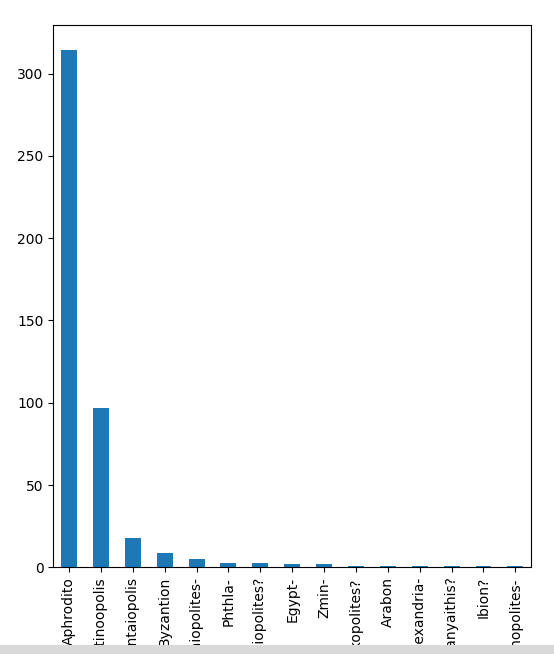

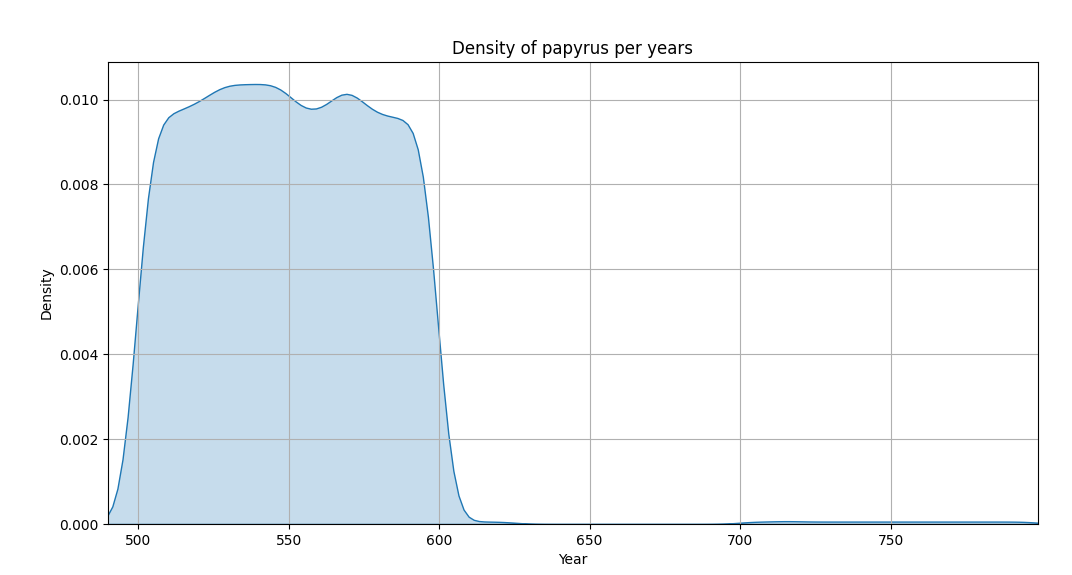


Colonnes disponibles dans le dataset :
['ID', 'Authors / works', 'Book form', 'Content (beta!)', 'Culture & genre', 'Date', 'Full Text', 'Language/script', 'Material', 'Note', 'People List', 'Places List', 'Provenance', 'Recto/Verso', 'Reuse note', 'Reuse type', 'Ro', 'Text Irregularities']




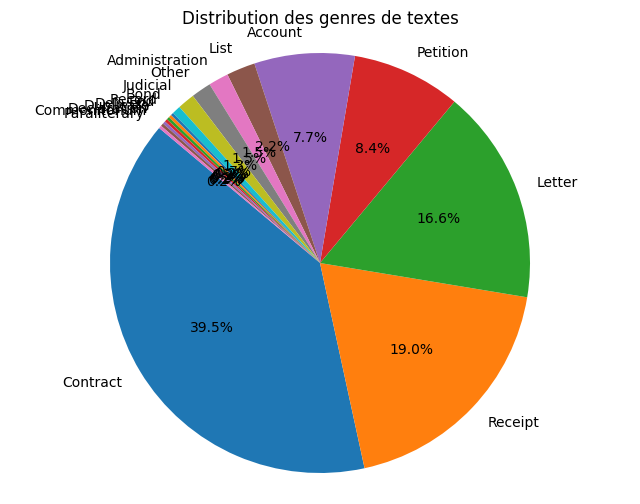


Nombre de papyrus réutilisés : 35



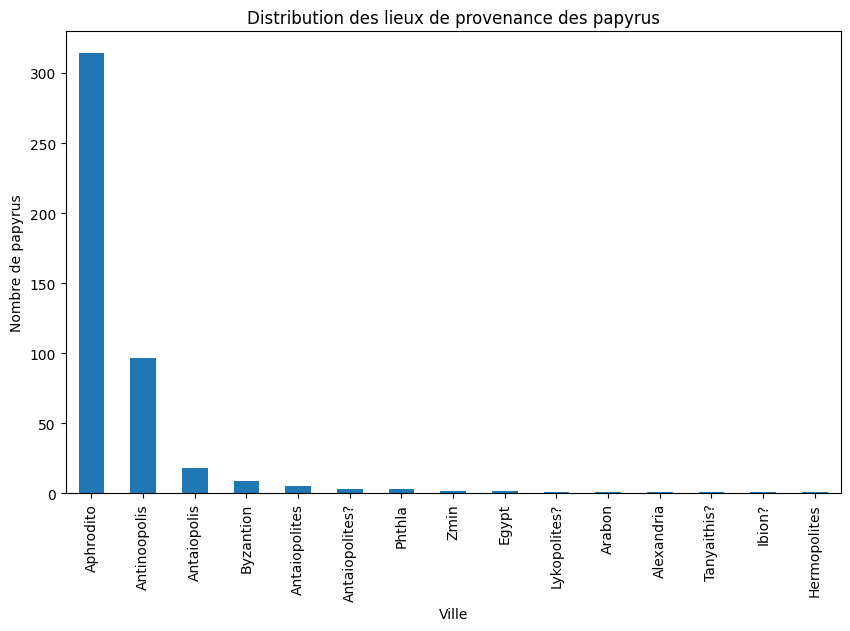


Sur les 459 papyri conservés après nettoyage, on remarque que la très grande majorité des papyri viennent d'Aphrodito (plus de 300), puis d'Antinoopolis (presque que 100) !



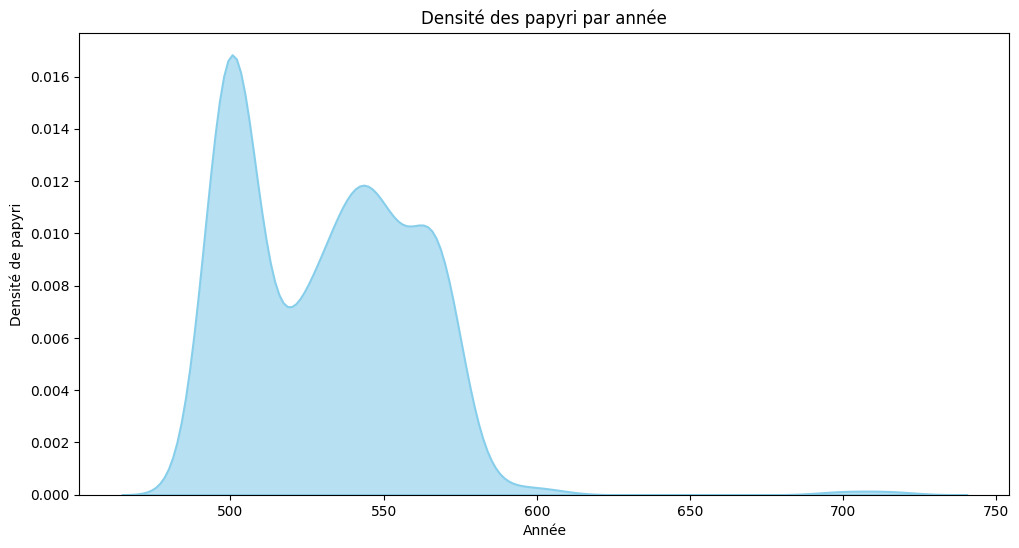

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
import seaborn as sns


def analyser_genres(df):
    # Extraire le premier mot, nettoyer la ponctuation, et stopper aux majuscules non initiales
    df['Genre'] = df['Content (beta!)'].str.split().str[0] \
        .str.replace(r'[^\w\s]', '', regex=True) \
        .str.extract(r'^([A-Z][a-z]*)(?=[A-Z]|\b)')[0]

    # Compter les occurrences de chaque genre après le nettoyage
    genre_counts = df['Genre'].value_counts()
    
    # Créer un pie chart pour les genres
    plt.figure(figsize=(8, 6))
    plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution des genres de textes')
    plt.axis('equal')
    plt.show()



# Compter tous les papyri ayant une entrée valide (non NaN) dans la colonne 'Reuse type' : on considère que quand ce n'est pas NaN dans 'Reuse type', alors le papyrus a été réutilisé
def analyser_reutilisation(df):
    reutilises_count = df[df['Reuse type'].notna()].shape[0]
    print(f"\nNombre de papyrus réutilisés : {reutilises_count}\n")

def analyser_villes(df):
    df['Ville'] = df['Provenance'].str.extract(r'([^ -]+)')[0]
    ville_counts = df['Ville'].value_counts()
    
    plt.figure(figsize=(10, 6))
    ville_counts.plot(kind='bar')
    plt.title('Distribution des lieux de provenance des papyrus')
    plt.xlabel('Ville')
    plt.ylabel('Nombre de papyrus')
    plt.xticks(rotation=90)
    plt.show()

# Regex pour capturer les dates au format "AD xxx" ou "AD xxx - xxx"
date_regex = r'(AD\s?\d{1,4})(?:\s?-\s?(AD\s?\d{1,4}))?'

def extract_and_format_date(date_str):
    match = re.search(date_regex, date_str)
    if match:
        start_date = match.group(1)
        end_date = match.group(2) if match.group(2) else start_date
        return (start_date, end_date)
    return 'nan'

def analyser_dates(df):
    df['formatted_dates'] = df['Date'].apply(lambda x: extract_and_format_date(x) if pd.notna(x) else 'nan')
    df['formatted_dates'].fillna('nan', inplace=True)
    """
    years = []
    for date_range in df['formatted_dates']:
        if date_range != 'nan':
            start_year = int(date_range[0].replace("AD ", "").strip())
            end_year = int(date_range[1].replace("AD ", "").strip())
            years.extend(range(start_year, end_year + 1))

    plt.figure(figsize=(10, 6))
    plt.hist(years, bins=np.arange(min(years), max(years) + 1), density=True, color='skyblue', edgecolor='black')
    plt.xlabel('Année')
    plt.ylabel('Densité de papyri')
    plt.title('Densité des papyri par année')
    plt.show()
    """
    # Extraire et créer un intervalle continu d'années
    years = []
    for date_range in df['formatted_dates']:
        if date_range != 'nan':
            start_year = int(date_range[0].replace("AD ", "").strip())
            end_year = int(date_range[1].replace("AD ", "").strip())
            years.extend(range(start_year, end_year + 1))
    
    # Création de la courbe de densité remplie avec Seaborn
    plt.figure(figsize=(12, 6))
    sns.kdeplot(years, fill=True, color="skyblue", alpha=0.6, linewidth=1.5)
    plt.xlabel('Année')
    plt.ylabel('Densité de papyri')
    plt.title('Densité des papyri par année')
    plt.show()

# Définir le chemin du fichier CSV
#fichier_csv = './papyrus_corpus.csv'  
# Charger et nettoyer le dataset
#dataset_nettoye = charger_et_nettoyer_dataset(fichier_csv)

# Afficher les colonnes disponibles
print("\nColonnes disponibles dans le dataset :")
print(dataset_nettoye.columns.tolist())
print("\n")

# Analyse des genres
analyser_genres(dataset_nettoye)

# Analyse de la réutilisation
analyser_reutilisation(dataset_nettoye)

# Analyse des lieux
analyser_villes(dataset_nettoye)
print("\nSur les 459 papyri conservés après nettoyage, on remarque que la très grande majorité des papyri viennent d'Aphrodito (plus de 300), puis d'Antinoopolis (presque que 100) !\n")

# Analyse des dates
analyser_dates(dataset_nettoye)


#### Observations :
- Nombre de papyrus réutilisés : 35
- Sur les 459 papyri conservés après nettoyage, on remarque que la très grande majorité des papyri viennent d'Aphrodito (plus de 300), puis d'Antinoopolis (presque que 100) !

# 6) Nettoyage du texte grec

* écrivez une première fonction de nettoyage du texte qui retire les chiffres arabes, les lignes perdues | gap | ainsi que les caractères spéciaux "†" et "⳨". Appliquez là au texte.
*  Voici la signification de certains codes en papyrologie :
 - Les petits points en dessous de certaines lettres indiquent que la lettre est défformée ou difficilement lisible
 - Les zones entre crochets droits ou parenthèses indiquent que le texte est reconstitué par un auteur, et était illisible / détruit.
 Ecrivez une fonction qui prend en entrée un texte de papyrus nettoyé et renvoie la proportion de lettres incertaines dans le texte. Stockez pour chaque texte cette valeur dans la colonne "Uncertain Portion"
 Combien y a-t de papyrus dont plus du tiers du texte est incertain ?

* Ecrivez une fonction qui enlève les parenthèses et les crochets mais converve leur contenu. Utilisez là sur le texte


In [3]:
# Fonction de nettoyage du texte qui retire les chiffres arabes, les lignes perdues | gap | ainsi que les caractères spéciaux "†" et "⳨"

import pandas as pd
import re

# Exemple de fonction de nettoyage
def nettoyer_texte_grec(texte):
    # Supprimer les chiffres arabes
    texte = re.sub(r'\d+', '', texte)
    # Retirer les mentions de "gap" (comme "gap", "gap |", "| gap |")
    texte = re.sub(r'\|? gap \|?', '', texte)
    # Supprimer les caractères spéciaux "†" et "⳨"
    texte = texte.replace("†", "").replace("⳨", "")
    # Retirer les lignes perdues représentées par des " | "
    texte = re.sub(r'\s*\|\s*', '', texte)
    # Nettoyer les espaces supplémentaires
    texte = re.sub(r'\s+', ' ', texte).strip()
    
    return texte



# Exemple d'utilisation
#texte_exemple = "12 Le texte grec † avec des chiffres et des | gap | lignes perdues 123 et des caractères ⳨"
#texte_nettoye = nettoyer_texte_grec(texte_exemple)
#print("Texte nettoyé :", texte_nettoye)


print(dataset_nettoye['Full Text'])
print("="*100)

# Appliquer la fonction de nettoyage à la colonne 'Full text'
dataset_nettoye['Full Text'] = dataset_nettoye['Full Text'].apply(nettoyer_texte_grec)

# Afficher le DataFrame nettoyé
print(dataset_nettoye['Full Text'])


200    1 [--------------------]  [---][.][---] 2 [---...
422    1 [--------------------]  [..........] 2 [..]ο...
452    1 [--------------------]  [---] 2 τῆς  τάξεως ...
473    1 †  Κωνσταντῖνος  Καλλινίκου  σιγγ(ουλάριος) ...
294    1 [---]  |slanting-stroke| 2 [μετὰ]  [τὴν]  [ὑ...
                             ...                        
413    1 [...]  κ̣[αὶ?] Δ̣ι̣ο̣σ̣κ[όρο(υ)]  καὶ Σενο(ύ...
521    1 ⳨  β̣ασιλείας  καὶ  ὑ̣πατεία̣ς̣  τ̣ο̣ῦ̣  θ̣ε...
202    1 |gap=1_lines| 2 ⳨  Παπνούθης  φρουρὸς  δ(ιὰ)...
576    1 [†]  [ἐν]  [ὀνόματι]  [τοῦ]  κυρίου  καὶ  δε...
523    1 [--------------------]  [---]  [ε]ἰ̣ς̣  τ̣α̣...
Name: Full Text, Length: 459, dtype: object
200    [--------------------] [---][.][---] [---][.]τ...
422    [--------------------] [..........] [..]ουτα ε...
452    [--------------------] [---] τῆς τάξεως τῆς ὑμ...
473    Κωνσταντῖνος Καλλινίκου σιγγ(ουλάριος) τῷ ἀδελ...
294    [---]slanting-stroke[μετὰ] [τὴν] [ὑπατείαν] [Φ...
                             ...            

In [4]:
# Fonction qui prend en entrée un texte de papyrus nettoyé et renvoie la proportion de lettres incertaines dans le texte


import pandas as pd
import re

# Exemple de fonction pour calculer la proportion de lettres incertaines
def proportion_lettres_incertaines(texte):
    # Nettoyer le texte pour enlever les caractères non pertinents
    texte_nettoye = re.sub(r'[^\w\s]', '', texte)  # Retirer les ponctuations
    lettres_total = len(texte_nettoye)  # Nombre total de lettres
    if lettres_total == 0:
        return 0  # Éviter la division par zéro
    
    # Identifier les lettres incertaines
    incertain_regex = r'[\[\(\)\.\u2022]'  # Caractères qui indiquent une incertitude
    lettres_incertaines = len(re.findall(incertain_regex, texte))
    
    # Calculer la proportion de lettres incertaines
    proportion = lettres_incertaines / lettres_total
    return proportion



# Appliquer la fonction de proportion sur la colonne 'Full text'
dataset_nettoye['Uncertain Portion'] = dataset_nettoye['Full Text'].apply(proportion_lettres_incertaines)

# Compter combien de papyrus ont plus du tiers (1/3) du texte incertain
nombre_papyrus_incertain = (dataset_nettoye['Uncertain Portion'] > (1/3)).sum()


# Afficher le DataFrame avec la nouvelle colonne et le résultat
colonnes_a_afficher = ['Full Text', 'Uncertain Portion']
df_affiche = dataset_nettoye[colonnes_a_afficher]
print(df_affiche)
print(f"Nombre de papyrus dont plus du tiers du texte est incertain : {nombre_papyrus_incertain}")


                                             Full Text  Uncertain Portion
200  [--------------------] [---][.][---] [---][.]τ...           0.143725
422  [--------------------] [..........] [..]ουτα ε...           0.185520
452  [--------------------] [---] τῆς τάξεως τῆς ὑμ...           0.049135
473  Κωνσταντῖνος Καλλινίκου σιγγ(ουλάριος) τῷ ἀδελ...           0.060370
294  [---]slanting-stroke[μετὰ] [τὴν] [ὑπατείαν] [Φ...           0.154574
..                                                 ...                ...
413  [...] κ̣[αὶ?] Δ̣ι̣ο̣σ̣κ[όρο(υ)] καὶ Σενο(ύ)θο(...           0.231707
521  β̣ασιλείας καὶ ὑ̣πατεία̣ς̣ τ̣ο̣ῦ̣ θ̣ε̣ι̣[οτάτο...           0.059135
202  gap=_linesΠαπνούθης φρουρὸς δ(ιὰ) \τοῦ/ κυρίου...           0.100806
576  [] [ἐν] [ὀνόματι] [τοῦ] κυρίου καὶ δεσπότου ἡμ...           0.137037
523  [--------------------] [---] [ε]ἰ̣ς̣ τ̣α̣ύ̣την...           0.141684

[459 rows x 2 columns]
Nombre de papyrus dont plus du tiers du texte est incertain : 12


#### Observations : 
- Nombre de papyrus dont plus du tiers du texte est incertain : 12

In [5]:
# Fonction qui enlève les parenthèses et les crochets mais converve leur conten

import re
import pandas as pd

def enlever_parentheses_et_crochets(texte):
    # Utiliser une regex pour remplacer les parenthèses et crochets tout en conservant leur contenu
    #texte_nettoye = re.sub(r'[\(\[]([^()\[\]]+)[\)\]]', r'\1', texte)
    texte_nettoye = re.sub(r'\[([^\]]+)\]', r'\1', texte)  # Enlever crochets
    texte_nettoye = re.sub(r'\(([^)]+)\)', r'\1', texte_nettoye)  # Enlever parenthèses
    return texte_nettoye

# Exemple d'utilisation
#texte_exemple = "Ceci est un texte avec (du contenu) et [plus de contenu]."
#texte_nettoye = enlever_parentheses_et_crochets(texte_exemple)
#print(texte_nettoye)


#df = dataset_nettoye

# Appliquer la fonction sur la colonne 'Full Text'
#df['Full Text'] = df['Full Text'].apply(enlever_parentheses_et_crochets)
dataset_nettoye['Full Text'] = dataset_nettoye['Full Text'].apply(enlever_parentheses_et_crochets)

# Afficher le DataFrame nettoyé
#print(df)
print(dataset_nettoye['Full Text'])

200    -------------------- ---.--- ---.τῆς τοῦ χρυσί...
422    -------------------- .......... ..ουτα ε̣ὐ̣χα̣...
452    -------------------- --- τῆς τάξεως τῆς ὑμετέρ...
473    Κωνσταντῖνος Καλλινίκου σιγγουλάριος τῷ ἀδελφῷ...
294    ---slanting-strokeμετὰ τὴν ὑπατείαν Φλαυίων Ὀρ...
                             ...                        
413    ... κ̣αὶ? Δ̣ι̣ο̣σ̣κόρου καὶ Σενούθου καὶ Ἀ̣πο̣...
521    β̣ασιλείας καὶ ὑ̣πατεία̣ς̣ τ̣ο̣ῦ̣ θ̣ε̣ι̣οτάτου...
202    gap=_linesΠαπνούθης φρουρὸς διὰ \τοῦ/ κυρίου Φ...
576    [] ἐν ὀνόματι τοῦ κυρίου καὶ δεσπότου ἡμῶν τοῦ...
523    -------------------- --- εἰ̣ς̣ τ̣α̣ύ̣την καθʼ ...
Name: Full Text, Length: 459, dtype: object


# 7) Identifier les noms de personnes et de lieux

* Observez le contenu des cellules de la case "people-list". Que remarquez-vous ? Réglez le(s) problème(s) de manière à ne retenir que les noms

* Téléchargez le modèle de NER suivant sur Hugging Face https://huggingface.co/UGARIT/grc-ner-bert
* Utilisez le pour stocker les entités repérées dans les colonnes "People Ugarit" "Places Ugarit" et "Other Ugarit"
Commentez les résultat

* Calculez le F1 score du système de NER sur notre corpus : de façon sévère (la catégorie de l'entité importe) et de façon tolérante (la catégorie de l'entité n'importe pas)


In [6]:
print(dataset_nettoye['People List'].dtype)


object


#### Remarques :

Quand on observe le contenu des cellules de la case "People List", il y a plusieurs problèmes :
- tout d'abord on remarque qu'il y a des espaces blancs (des espaces qui servent à rendre le texte plus lisible, mais qui sont indésirables ici : ' ', des '\n', '\r', '\t')
- ensuite il y a des nombres qui ont été pris avec les noms des personnes (on y retrouve des '1', '2', '3', '4', '5', '14', '22', etc. collés à des noms) 
- le format : pour chaque ligne de la colonne "People List", on a en fait une liste d'un seul élément qui est une chaine de caractères contenant toute l'information de la cellule (cf. exemple de DataFrame avec colonne 'People List')
- et enfin : il y a du bruit (typiquement les infos qui ne sont pas en grec du style "We do not have any people attestations for this text" ou "Subscribe to export the table") qui ne sont pas des noms et qu'on ne veut pas garder

On va donc les nettoyer avec le code suivant !

In [7]:
"""
Quand on observe le contenu des cellules de la case "People List", il y a plusieurs problèmes :
- tout d'abord on remarque qu'il y a des espaces blancs (des espaces qui servent à rendre le texte plus lisible, mais qui sont indésirables ici : ' ', des '\n', '\r', '\t')
- ensuite il y a des nombres qui ont été pris avec les noms des personnes (on y retrouve des '1', '2', '3', '4', '5', '14', '22', etc. collés à des noms) 
- le format : pour chaque ligne de la colonne "People List", on a en fait une liste d'un seul élément qui est une chaine de caractères contenant toute l'information de la cellule (cf. exemple de DataFrame avec colonne 'People List')
- et enfin : il y a du bruit (typiquement les infos qui ne sont pas en grec du style "We do not have any people attestations for this text" ou "Subscribe to export the table") qui ne sont pas des noms et qu'on ne veut pas garder

On va donc les nettoyer avec le code suivant !
"""


import pandas as pd
import re

"""
# Exemple de DataFrame avec la colonne 'People List'
data = {
    'People List': [
        ["'\r \n \t Ἀντίνοος', 'We do not have', ' Διονύσιος', '\t\t\t Ἀριστοτέλης', ' Σωκράτης'"],
        ["'We don't have', 'Ἰωάννης', 'Ἀλεξάνδρος'"],
        ["'Πλάτων', 'Ἀριστοτέλης', 'Ἀριστοτέλης'"]
    ]
}
df = pd.DataFrame(data)
"""

print("Colonne People List avant nettoyage:\n")
print(dataset_nettoye['People List'])
print("="*100)


# Fonction pour extraire uniquement les mots grecs d'une ligne
def extract_greek_words(text):
    # Joindre la liste en une seule chaîne si elle est encore sous forme de liste
    if isinstance(text, list):
        text = text[0]
    # Extraire les mots grecs
    #return re.findall(r"[\u0370-\u03FF]+", text)
    # Extraire les mots grecs (y compris les lettres grecques étendues et accentuées)
    return re.findall(r"[\u0370-\u03FF\u1F00-\u1FFF]+", text)

# Appliquer la fonction à toutes les lignes de la colonne 'People List'
#df['People List'] = df['People List'].apply(extract_greek_words)
dataset_nettoye['People List'] = dataset_nettoye['People List'].apply(extract_greek_words)

# Afficher le résultat
print("\nColonne People List DataFrame après nettoyage:\n")
print(dataset_nettoye['People List'])

Colonne People List avant nettoyage:

200    [' 2Ἀντίνοος', 'Διόσκορος', ' 3Πανεσνευς', 'Su...
422    ['\r\n        \t\t\t\t\tWe currently do not ha...
452    [' 13Νέπωτος', 'Ἀφθονίου', ' 14Νέπως', ' 22Ἀφθ...
473    [' 1Κωνσταντῖνος', 'Καλλινίκου', 'Διοσκόρῳ', '...
294    [' 4Αὐρηλίῳ ...', ' 5Αὐρήλιοι ...', '...', 'Ἰω...
                             ...                        
413        ['Δωρόθεος', 'Subscribe to export the table']
521        ['A 5Μηνᾶν', 'Subscribe to export the table']
202    [' 2Παπνούθης', 'Φοιβάμμωνος', 'Λεωντίου', 'Φο...
576    [' 6Αὐρήλιος ...ιας', 'Ἀπλῶτος', 'Κύρας', 'Sub...
523    ['\r\n        \t\t\t\t\tWe currently do not ha...
Name: People List, Length: 459, dtype: object

Colonne People List DataFrame après nettoyage:

200                     [Ἀντίνοος, Διόσκορος, Πανεσνευς]
422                                                   []
452                 [Νέπωτος, Ἀφθονίου, Νέπως, Ἀφθονίου]
473    [Κωνσταντῖνος, Καλλινίκου, Διοσκόρῳ, Ἀπολλῶτος...
294         

In [8]:
!pip install transformers torch


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
from transformers import pipeline

# create pipeline for NER
ner = pipeline('ner', model="UGARIT/grc-ner-bert", aggregation_strategy = 'first')
ner("ταῦτα εἴπας ὁ Ἀλέξανδρος παρίζει Πέρσῃ ἀνδρὶ ἄνδρα Μακεδόνα ὡς γυναῖκα τῷ λόγῳ · οἳ δέ , ἐπείτε σφέων οἱ Πέρσαι ψαύειν ἐπειρῶντο , διεργάζοντο αὐτούς .")


/home/ngauv-nicolas/miniconda3/envs/tal-ml/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ngauv-nicolas/miniconda3/envs/tal-ml/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ngauv-nicolas/miniconda3/envs/tal-ml/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/ngauv-nicolas/miniconda3/envs/tal-ml/lib/python3.10/site-packages/transformers/modeling_utils.py:519: FutureWarn

[{'entity_group': 'PER',
  'score': 0.9999349,
  'word': 'αλεξανδρος',
  'start': 14,
  'end': 24},
 {'entity_group': 'NORP',
  'score': 0.9369563,
  'word': 'περση',
  'start': 33,
  'end': 38},
 {'entity_group': 'NORP',
  'score': 0.60742134,
  'word': 'μακεδονα',
  'start': 51,
  'end': 59},
 {'entity_group': 'NORP',
  'score': 0.9900457,
  'word': 'περσαι',
  'start': 105,
  'end': 111}]

#### Remarques :
Voici les labels du modèle : PER 	LOC 	NORP 	MISC

Person pour les personnes
Location pour les lieux
NORP pour "Nationalities, Organizations, and Religions"
MISC pour les autres entités qui ne rentrent dans aucune des 3 premières catégories

Ici on veut 'People Ugarit', 'Places Ugarit' et 'Other Ugarit' seulement... On va donc considérer que :
- PER est pour 'People Ugarit',
- LOC est pour 'Places Ugarit',
- NORP et MISC sont pour 'Other Ugarit'

In [10]:
from transformers import pipeline
import pandas as pd

"""
Voici les labels du modèle : Person 	Location 	NORP 	MISC

Person pour les personnes
Location pour les lieux
NORP pour "Nationalities, Organizations, and Religions"
MISC pour les autres entités qui ne rentrent dans aucune des 3 premières catégories

Ici on veut 'People Ugarit', 'Places Ugarit' et 'Other Ugarit' seulement... On va donc considérer que :
- PER est pour 'People Ugarit',
- LOC est pour 'Places Ugarit',
- NORP et MISC sont pour 'Other Ugarit'
"""

# Chargement du modèle NER
ner = pipeline('ner', model="UGARIT/grc-ner-bert", aggregation_strategy='first')


# Création de la fonction d'extraction : une fonction pour traiter un texte et stocker les entités dans le DataFrame.
def extraire_entites(texte):
    resultats = ner(texte)
    people = []
    places = []
    other = []
    
    for entite in resultats:
        if entite['entity_group'] == 'PER':
            people.append(entite['word'])
        elif entite['entity_group'] == 'LOC':
            places.append(entite['word'])
        else:
            # Pour les catégories NORP et MISC
            other.append(entite['word'])    

    return pd.Series([people, places, other])


# Application de la fonction au contenu de 'Full Text'
dataset_nettoye[['People Ugarit', 'Places Ugarit', 'Other Ugarit']] = dataset_nettoye['Full Text'].apply(extraire_entites)

print(dataset_nettoye[['People Ugarit', 'Places Ugarit', 'Other Ugarit']])


                                         People Ugarit  \
200  [αντινοος, διοσκορος, ανταιου, - -, -, - -, - ...   
422                                [φλαυιου βασιλειου]   
452                       [σιγγουλαριου, σιγγουλαριος]   
473  [κωνσταντινος, καλλινικου, σιγγουλαριος, διοσκ...   
294  [ορεστου, λαμπαδιου, αφροδιτης, ιωσηφιου, αφρο...   
..                                                 ...   
413                  [σενουθου, καλλινικου, αφροδιτης]   
521  [φλαυιου, ιουστινου, αντινοου, διονυσια, ιωανν...   
202  [κυριου, φοιβαμμωνος, λεωντιου, φοιβαμμωνι, τρ...   
576  [φλαυιου, μαυρικιου, τιβεριου, αυγουστου, αυρη...   
523                                                 []   

                                         Places Ugarit  \
200  [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...   
422                                                 []   
452                     [ανταιοπολιτων, ανταιοπολιτων]   
473                                                 []   
294          

#### Remarques :
- Quand j'applique la recherche d'entités nommées sur le contenu de 'Full Text', le modèle a pris beaucoup de chaines de caracères composées seulement de tirets '-' et d'espace ' ' en compte comme entités que ce soit pour des lieux ou des personnes (mais pas vraiment pour les autres entités)... C'est problématique car le tiret n'est pas une entité du tout...
    - On aurait pu (et aurait dû ?) les retirer avant d'appliquer le NER, je vais donc les retirer maintenant

In [11]:
# Retirer les chaines de caractères des listes d'entités nommées pour chaques lignes des colonnes Ugarit, qui sont composées uniquement d'espace ' ' et de tirets '-'

import re

# Fonction mise à jour pour filtrer les chaînes composées uniquement d'espaces, tirets, ou autres caractères non-alphanumériques
def nettoyer_liste_entites(liste):
    return [element for element in liste if not re.fullmatch(r"[-\s]+", element)]

# Appliquer la fonction de nettoyage à chaque colonne
dataset_nettoye['People Ugarit'] = dataset_nettoye['People Ugarit'].apply(nettoyer_liste_entites)
dataset_nettoye['Places Ugarit'] = dataset_nettoye['Places Ugarit'].apply(nettoyer_liste_entites)
dataset_nettoye['Other Ugarit'] = dataset_nettoye['Other Ugarit'].apply(nettoyer_liste_entites)

# Afficher le DataFrame nettoyé
print(dataset_nettoye[['People Ugarit', 'Places Ugarit', 'Other Ugarit']])


                                         People Ugarit  \
200                     [αντινοος, διοσκορος, ανταιου]   
422                                [φλαυιου βασιλειου]   
452                       [σιγγουλαριου, σιγγουλαριος]   
473  [κωνσταντινος, καλλινικου, σιγγουλαριος, διοσκ...   
294  [ορεστου, λαμπαδιου, αφροδιτης, ιωσηφιου, αφρο...   
..                                                 ...   
413                  [σενουθου, καλλινικου, αφροδιτης]   
521  [φλαυιου, ιουστινου, αντινοου, διονυσια, ιωανν...   
202  [κυριου, φοιβαμμωνος, λεωντιου, φοιβαμμωνι, τρ...   
576  [φλαυιου, μαυρικιου, τιβεριου, αυγουστου, αυρη...   
523                                                 []   

                      Places Ugarit  \
200                              []   
422                              []   
452  [ανταιοπολιτων, ανταιοπολιτων]   
473                              []   
294                      [αυρηλιοι]   
..                              ...   
413                           

#### On peut s'y prendre autrement en appliquant directement le modèle sur le contenu des colonnes 'People List' et ' Places List' : 
# PAS À FAIRE : à appliquer sur le Full Text (et résultats de cette application dans les Ugarit), et 'People List' et 'Places List' vont servir de golden corpus

In [22]:
"""

from transformers import pipeline
import pandas as pd

"""
"""
Voici les labels du modèle : Person 	Location 	NORP 	MISC

Person pour les personnes
Location pour les lieux
NORP pour "Nationalities, Organizations, and Religions"
MISC pour les autres entités qui ne rentrent dans aucune des 3 premières catégories

Ici on veut 'People Ugarit', 'Places Ugarit' et 'Other Ugarit' seulement... On va donc considérer que :
- PER est pour 'People Ugarit',
- LOC est pour 'Places Ugarit',
- NORP et MISC sont pour 'Other Ugarit'
"""
"""
# Chargement du modèle NER
ner = pipeline('ner', model="UGARIT/grc-ner-bert", aggregation_strategy='first')

#true_peoples_count = 0
#true_places_count = 0
# Création de la fonction d'extraction : une fonction pour traiter un texte et stocker les entités dans le DataFrame.
def extraire_entites(texte):
    resultats = ner(texte)
    people = []
    places = []
    other = []
    
    for entite in resultats:
        if entite['entity_group'] == 'PER':
            people.append(entite['word'])
        elif entite['entity_group'] == 'LOC':
            places.append(entite['word'])
        else:
            # Pour les catégories NORP et MISC
            other.append(entite['word'])    

    return pd.Series([people, places, other])


data = {}
df = pd.DataFrame(data)    

# ENCORE À FAIRE :
    # Il faut nettoyer et ne laisser que les caractères grecs et recommencer pour avoir une df['places_list'] plus propre avec seulement le nom des lieux, sans ponctuations
        # Important pour les calcul de precision rappel et f1 score après
       
# Fonction pour extraire uniquement les mots grecs d'une ligne
def extract_greek_words(text):
    # Joindre la liste en une seule chaîne si elle est encore sous forme de liste
    if isinstance(text, list):
        text = text[0]
    # Extraire les mots grecs
    #return re.findall(r"[\u0370-\u03FF]+", text)
    # Extraire les mots grecs (y compris les lettres grecques étendues et accentuées)
    return re.findall(r"[\u0370-\u03FF\u1F00-\u1FFF]+", text)
"""
"""
# Appliquer la fonction à toutes les lignes de la colonne 'People List'
#df['People List'] = df['People List'].apply(extract_greek_words)
dataset_nettoye['People List'] = dataset_nettoye['People List'].apply(extract_greek_words) 
"""
"""
# Fonction pour extraire uniquement les mots grecs d'une ligne et les normaliser
def extract_and_normalize_greek_words(text):
    if isinstance(text, list):
        text = text[0]
    
    # Extraire les mots grecs et les normaliser en supprimant les annotations
    words = re.findall(r"[\u0370-\u03FF\u1F00-\u1FFF]+", text)
    normalized_words = []
    
    for word in words:
        # Enlever les caractères dans les crochets
        cleaned_word = re.sub(r'\[.*?\]', '', word)
        normalized_words.append(cleaned_word)
    
    # Combiner les mots nettoyés en une seule chaîne
    return ''.join(normalized_words)
"""



"""
# Fonction pour extraire uniquement les mots grecs d'une ligne et les normaliser
def extract_and_normalize_greek_words(text):
    if isinstance(text, list):
        text = text[0]
    
    # Extraire les mots grecs (y compris les lettres grecques étendues et accentuées)
    words = re.findall(r"[\u0370-\u03FF\u1F00-\u1FFF\s]+", text)
    normalized_words = []
    
    for word in words:
        # Enlever les caractères dans les crochets
        cleaned_word = re.sub(r'\[.*?\]', '', word)
        normalized_words.append(cleaned_word.strip())
    
    # Joindre les mots nettoyés en une seule chaîne avec un espace entre chaque mot
    return ' '.join(normalized_words)
"""





"""
import re
import unicodedata

# Fonction pour extraire et normaliser les mots grecs
def extract_and_normalize_greek_words(text):
    if isinstance(text, list):
        text = text[0]

    # Étape 1 : Remplacer les lettres avec diacritiques (dotted letters) par leurs équivalents simples
    text = ''.join(
        char for char in unicodedata.normalize('NFD', text) 
        if unicodedata.category(char) != 'Mn' or char == 'ͺ'  # Garde le diacritique grec 'ͺ' s'il existe
    )

    # Étape 2 : Supprimer la ponctuation sauf les virgules avec l'espace suivant
    text = re.sub(r'(?<!\w)[.,;:!?"\'()]', '', text)

    # Étape 3 : Supprimer les crochets et concaténer les parties de part et d'autre sans ajouter d'espace
    text = re.sub(r'\[([^\]]*?)\]', r'\1', text)  # Supprime le crochet et garde le texte intérieur sans espace
    
    # Étape 4 : Extraire uniquement les mots grecs étendus avec les espaces entre eux
    words = re.findall(r"[\u0370-\u03FF\u1F00-\u1FFF]+(?:, )?", text)
    
    return words






df['places_list'] = dataset_nettoye['Places List']
# df['places_list'] = df['places_list'].apply(extract_greek_words)  # ICI
df['places_list'] = df['places_list'].apply(extract_and_normalize_greek_words)  # ICI
df['places_list'] = df['places_list'].apply(lambda x: x if isinstance(x, list) else [x])

df['people_list'] = dataset_nettoye['People List']

# Fusionner le contenu des deux colonnes dans une troisième colonne
df['people_places'] = df.apply(lambda row: row['people_list'] + row['places_list'], axis=1)

"""
"""
# Appliquer la fonction extraire_entites à chaque ligne de 'People List'
dataset_nettoye[['People Ugarit', 'Places Ugarit', 'Other Ugarit']] = dataset_nettoye['People List'].apply(
    lambda x: extraire_entites(" ".join(x)) if isinstance(x, list) else ""
)
"""
"""
# Appliquer la fonction extraire_entites à chaque ligne de 'people_places'
dataset_nettoye[['People Ugarit', 'Places Ugarit', 'Other Ugarit']] = df['people_places'].apply(
    lambda x: extraire_entites(" ".join(x)) if isinstance(x, list) else ""
)


print(dataset_nettoye[['People Ugarit', 'Places Ugarit', 'Other Ugarit']])



"""

/home/ngauv-nicolas/miniconda3/envs/tal-ml/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/ngauv-nicolas/miniconda3/envs/tal-ml/lib/python3.10/site-packages/transformers/modeling_utils.py:519: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless

                                         People Ugarit  \
200                              [αντινοος, διοσκορος]   
422                                                 []   
452                                                 []   
473  [κωνσταντινος, διοσκορω, κωνσταντινος, κωνσταν...   
294                   [ιωσηφιου, αφροδιτης, αφροδιτης]   
..                                                 ...   
413                                         [δωροθεος]   
521                                                 []   
202  [παπνουθης, φοιβαμμωνος, λεωντιου, φοιβαμμωνι,...   
576                                            [κυρας]   
523                                                 []   

                Places Ugarit                    Other Ugarit  
200                 [ανταιου]                     [πανεσνευς]  
422                        []                              []  
452                        []  [ανταιοπολιτων, ανταιοπολιτων]  
473                        []                  

In [12]:
#print(df['people_list'].apply(type).unique())
#print(df['places_list'].apply(type).unique())

print(dataset_nettoye['People List'].apply(type).unique())
print(dataset_nettoye['Places List'].apply(type).unique())

[<class 'list'>]
[<class 'str'>]


In [13]:
print(dataset_nettoye['Places List'])

200    {'[- Σκινε]π̣ωει': '109542', '[- Σκινε]πωει': ...
422                                                   {}
452    {'τῆς Ἀνταιοπολιτῶν̣': '69336', 'ἐν τῇ Ἀντα[ιο...
473                         {'ἀπὸ Ἀφροδ(ίτης)': '69338'}
294    {'[ἀπὸ κ]ώμης Ἀφροδίτης': '69341', 'τοῦ Ἀνταιο...
                             ...                        
413                                                   {}
521                                                   {}
202                                                   {}
576                     {'[ἀπὸ] κ̣[ώμ]η̣ς Φβυ': '97904'}
523                                                   {}
Name: Places List, Length: 459, dtype: object


In [14]:
print(dataset_nettoye['People List'])

200                     [Ἀντίνοος, Διόσκορος, Πανεσνευς]
422                                                   []
452                 [Νέπωτος, Ἀφθονίου, Νέπως, Ἀφθονίου]
473    [Κωνσταντῖνος, Καλλινίκου, Διοσκόρῳ, Ἀπολλῶτος...
294                        [Αὐρηλίῳ, Αὐρήλιοι, Ἰωσηφίου]
                             ...                        
413                                           [Δωρόθεος]
521                                              [Μηνᾶν]
202    [Παπνούθης, Φοιβάμμωνος, Λεωντίου, Φοιβάμμωνι,...
576                      [Αὐρήλιος, ιας, Ἀπλῶτος, Κύρας]
523                                                   []
Name: People List, Length: 459, dtype: object


In [29]:
#print(df['places_list'])

# Il faut nettoyer et ne laisser que les caractères grecs et recommencer pour avoir une df['places_list'] plus propre avec seulement le nom des lieux, sans ponctuations
# Important pour les calcul de precision rappel et f1 score après

In [15]:
print(dataset_nettoye['Places Ugarit'])

200                                []
422                                []
452    [ανταιοπολιτων, ανταιοπολιτων]
473                                []
294                        [αυρηλιοι]
                    ...              
413                                []
521                                []
202                                []
576                             [φβυ]
523                                []
Name: Places Ugarit, Length: 459, dtype: object


In [16]:
print(dataset_nettoye['People List'])

200                     [Ἀντίνοος, Διόσκορος, Πανεσνευς]
422                                                   []
452                 [Νέπωτος, Ἀφθονίου, Νέπως, Ἀφθονίου]
473    [Κωνσταντῖνος, Καλλινίκου, Διοσκόρῳ, Ἀπολλῶτος...
294                        [Αὐρηλίῳ, Αὐρήλιοι, Ἰωσηφίου]
                             ...                        
413                                           [Δωρόθεος]
521                                              [Μηνᾶν]
202    [Παπνούθης, Φοιβάμμωνος, Λεωντίου, Φοιβάμμωνι,...
576                      [Αὐρήλιος, ιας, Ἀπλῶτος, Κύρας]
523                                                   []
Name: People List, Length: 459, dtype: object


In [32]:
#print(df['people_list'])

In [17]:
print(dataset_nettoye['People Ugarit'])

200                       [αντινοος, διοσκορος, ανταιου]
422                                  [φλαυιου βασιλειου]
452                         [σιγγουλαριου, σιγγουλαριος]
473    [κωνσταντινος, καλλινικου, σιγγουλαριος, διοσκ...
294    [ορεστου, λαμπαδιου, αφροδιτης, ιωσηφιου, αφρο...
                             ...                        
413                    [σενουθου, καλλινικου, αφροδιτης]
521    [φλαυιου, ιουστινου, αντινοου, διονυσια, ιωανν...
202    [κυριου, φοιβαμμωνος, λεωντιου, φοιβαμμωνι, τρ...
576    [φλαυιου, μαυρικιου, τιβεριου, αυγουστου, αυρη...
523                                                   []
Name: People Ugarit, Length: 459, dtype: object


In [18]:
print(dataset_nettoye['Other Ugarit'])

200                                               []
422                                               []
452                       [εξπελλευτου, εξπελλευτης]
473                                    [ινδικτιωνος]
294                                        [φλαυιων]
                           ...                      
413                                               []
521                           [ινδικτιονος, χαραττω]
202    [ινδικτιονος, ινδικτιονος, μουσαιου, ερμειου]
576                                               []
523                                         [σταθμω]
Name: Other Ugarit, Length: 459, dtype: object


#### Je considère 'People List' et les clés de 'Places List' comme les vrais entités de personnes et de lieux (vérité ou réalité de terrain, golden corpus) ; et 'People Ugarit' et 'Places Ugarit' comme les entités prédites de personnes et de lieux prédites par le modèle

#### Calcul du F1 score du système de NER sur notre corpus de façon sévère (la catégorie de l'entité importe) :
- on va comparer les colonnes 'People List' et 'Places List' avec 'People Ugarit' et 'Places Ugarit' en prenant compte la catégorie de l'entité
    - cela va se résumer à une vérification de la présence des entités de 'People List' dans 'People Ugarit' ; et des entités de 'Places List' dans 'People Ugarit'
        - Dans 'People List' tout est propre et on a une liste d'entité de personnes ; dans 'Places List' on a un dictionnaire dont les clés sont les entités de lieu et les valeurs les identifiants de leur localisation

In [44]:
"""

from sklearn.metrics import precision_score, recall_score, f1_score

# Extraction des listes d'entités
true_people = dataset_nettoye['People List'].dropna().explode().unique().tolist()
predicted_people = dataset_nettoye['People Ugarit'].dropna().explode().unique().tolist()

true_places = dataset_nettoye['Places List'].dropna().explode().unique().tolist()
predicted_places = dataset_nettoye['Places Ugarit'].dropna().explode().unique().tolist()

# Calculer les métriques pour les personnes
precision_people = precision_score(true_people, predicted_people, average='weighted', zero_division=0)
recall_people = recall_score(true_people, predicted_people, average='weighted', zero_division=0)
f1_people = f1_score(true_people, predicted_people, average='weighted', zero_division=0)

# Calculer les métriques pour les lieux
precision_places = precision_score(true_places, predicted_places, average='weighted', zero_division=0)
recall_places = recall_score(true_places, predicted_places, average='weighted', zero_division=0)
f1_places = f1_score(true_places, predicted_places, average='weighted', zero_division=0)

print(f'--- Pour les personnes ---')
print(f'Précision: {precision_people}')
print(f'Reappel: {recall_people}')
print(f'F1 Score: {f1_people}')

print(f'--- Pour les lieux ---')
print(f'Précision: {precision_places}')
print(f'Reappel: {recall_places}')
print(f'F1 Score: {f1_places}')

"""

ValueError: Found input variables with inconsistent numbers of samples: [1240, 966]

In [24]:
"""
from sklearn.metrics import precision_score, recall_score, f1_score

# Extraction des listes d'entités
true_people = dataset_nettoye['People List'].dropna().explode().unique().tolist()
predicted_people = dataset_nettoye['People Ugarit'].dropna().explode().unique().tolist()

true_places = dataset_nettoye['Places List'].dropna().explode().unique().tolist()
predicted_places = dataset_nettoye['Places Ugarit'].dropna().explode().unique().tolist()

# Adapter les longueurs des listes prédites pour qu'elles correspondent aux vraies listes
while len(predicted_people) < len(true_people):
    predicted_people.append("FAUX_ENTITE")  # Ajout d'une valeur fictive pour les personnes

while len(predicted_places) < len(true_places):
    predicted_places.append("FAUX_ENTITE")  # Ajout d'une valeur fictive pour les lieux

# Calculer les métriques pour les personnes
precision_people = precision_score(true_people, predicted_people, average='weighted', zero_division=0)
recall_people = recall_score(true_people, predicted_people, average='weighted', zero_division=0)
f1_people = f1_score(true_people, predicted_people, average='weighted', zero_division=0)

# Calculer les métriques pour les lieux
precision_places = precision_score(true_places, predicted_places, average='weighted', zero_division=0)
recall_places = recall_score(true_places, predicted_places, average='weighted', zero_division=0)
f1_places = f1_score(true_places, predicted_places, average='weighted', zero_division=0)

print(f'--- Pour les personnes ---')
print(f'Précision: {precision_people}')
print(f'Reappel: {recall_people}')
print(f'F1 Score: {f1_people}')

print(f'--- Pour les lieux ---')
print(f'Précision: {precision_places}')
print(f'Reappel: {recall_places}')
print(f'F1 Score: {f1_places}')
"""

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

#### Calcul du F1 score du système de NER sur notre corpus de façon tolérante (la catégorie de l'entité n'importe pas) :
- on va comparer les colonnes 'People List' et 'Places List' avec 'People Ugarit' et 'Places Ugarit' sans prendre en compte la catégorie de l'entité
    - cela va se résumer à une vérification de la présence des entités de 'People List' et 'Places List' dans 'People Ugarit' et 'Places Ugarit', peu importe si elles sont dans la bonne colonne Ugarit
        - Dans 'People List' tout est propre et on a une liste d'entité de personnes ; dans 'Places List' on a un dictionnaire dont les clés sont les entités de lieu et les valeurs les identifiants de leur localisation

In [16]:
"""

from sklearn.metrics import precision_score, recall_score, f1_score

"""
"""
# Exemple
true_people = [...]  # Liste d'entités de personnes (People List)
predicted_people = [...]  # Liste d'entités prédites par le modèle (People Ugarit)

true_places = [...]  # Liste d'entités de lieux (Places List)
predicted_places = [...]  # Liste d'entités prédites par le modèle (Places Ugarit)
"""
"""
# Extraction des listes d'entités
true_people = dataset_nettoye['People List'].dropna().explode().unique().tolist()  # Vraies entités de personnes
predicted_people = dataset_nettoye['People Ugarit'].dropna().explode().unique().tolist()  # Entités prédites de personnes

true_places = dataset_nettoye['Places List'].dropna().explode().unique().tolist()  # Vraies entités de lieux
predicted_places = dataset_nettoye['Places Ugarit'].dropna().explode().unique().tolist()  # Entités prédites de lieux


# Concaténer les listes pour le calcul
y_true = true_people + true_places
y_pred = predicted_people + predicted_places

# Calculer la précision, le rappel et le F1 score
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print(f'Précision: {precision}')
print(f'Rappel: {recall}')
print(f'F1 Score: {f1}')
"""

ValueError: Found input variables with inconsistent numbers of samples: [1563, 1207]

In [20]:
"""

from sklearn.metrics import precision_score, recall_score, f1_score

# Labels pour chaque entité prédites de personnes (1 si présente dans les vraies, sinon 0)
y_pred_people = [1 if ent in true_people else 0 for ent in predicted_people]
y_true_people = [1] * len(predicted_people)  # on marque tous les prédits comme existants pour comparer

# Calcul des métriques pour les personnes
precision_people = precision_score(y_true_people, y_pred_people, zero_division=0)
recall_people = recall_score(y_true_people, y_pred_people, zero_division=0)
f1_people = f1_score(y_true_people, y_pred_people, zero_division=0)

# Labels pour chaque entité prédites de lieux (1 si présente dans les vraies, sinon 0)
y_pred_places = [1 if ent in true_places else 0 for ent in predicted_places]
y_true_places = [1] * len(predicted_places)

precision_places = precision_score(y_true_places, y_pred_places, zero_division=0)
recall_places = recall_score(y_true_places, y_pred_places, zero_division=0)
f1_places = f1_score(y_true_places, y_pred_places, zero_division=0)

print('\nPersonnes :\n')
print(f'Précision: {precision_people}')
print(f'Rappel: {recall_people}')
print(f'F1 Score: {f1_people}')

print('\nLieux :\n')
print(f'Précision: {precision_places}')
print(f'Rappel: {recall_places}')
print(f'F1 Score: {f1_places}')

"""


Personnes :

Précision: 1.0
Rappel: 0.003784295175023652
F1 Score: 0.007540056550424129

Lieux :

Précision: 0.0
Rappel: 0.0
F1 Score: 0.0


In [22]:
"""

set_true_people = set(true_people)
set_predicted_people = set(predicted_people)

# Détecter les TP, FP et FN
tp_people = len(set_true_people & set_predicted_people)  # vraies entités bien détectées
fp_people = len(set_predicted_people - set_true_people)  # fausses prédictions
fn_people = len(set_true_people - set_predicted_people)  # vraies entités manquées

# Calculs manuels de précision, rappel et F1
precision_people = tp_people / (tp_people + fp_people) if tp_people + fp_people > 0 else 0
recall_people = tp_people / (tp_people + fn_people) if tp_people + fn_people > 0 else 0
f1_people = 2 * (precision_people * recall_people) / (precision_people + recall_people) if (precision_people + recall_people) > 0 else 0


print('\nPersonnes :\n')
print(f'Précision: {precision_people}')
print(f'Rappel: {recall_people}')
print(f'F1 Score: {f1_people}')

print('\nLieux :\n')
print(f'Précision: {precision_places}')
print(f'Rappel: {recall_places}')
print(f'F1 Score: {f1_places}')

"""


Personnes :

Précision: 0.003784295175023652
Rappel: 0.0032258064516129032
F1 Score: 0.00348280365694384

Lieux :

Précision: 0.0
Rappel: 0.0
F1 Score: 0.0


In [25]:
"""

# Création des ensembles d'entités vraies et prédites
true_people_set = set(true_people)
predicted_people_set = set(predicted_people)

# Intersection des ensembles (entités correctement prédits)
intersection_people = true_people_set & predicted_people_set

# Calcul des scores
precision_people = len(intersection_people) / len(predicted_people_set) if predicted_people_set else 0
recall_people = len(intersection_people) / len(true_people_set) if true_people_set else 0
f1_people = 2 * precision_people * recall_people / (precision_people + recall_people) if (precision_people + recall_people) > 0 else 0

print(f"Précision (Personnes) : {precision_people}")
print(f"Rappel (Personnes) : {recall_people}")
print(f"F1 Score (Personnes) : {f1_people}")

"""

Précision (Personnes) : 0.003780718336483932
Rappel (Personnes) : 0.0032258064516129032
F1 Score (Personnes) : 0.003481288076588338


In [19]:
# Extraction des listes d'entités
true_people = dataset_nettoye['People List'].dropna().explode().unique().tolist()
predicted_people = dataset_nettoye['People Ugarit'].dropna().explode().unique().tolist()

true_places = dataset_nettoye['Places List'].dropna().explode().unique().tolist()
predicted_places = dataset_nettoye['Places Ugarit'].dropna().explode().unique().tolist()

In [20]:
print(f'Vraies entités de personnes : {len(true_people)}')
print(f'Entités prédites de personnes : {len(predicted_people)}')
print(f'Vraies entités de lieux : {len(true_places)}')
print(f'Entités prédites de lieux : {len(predicted_places)}')

# Compter le nombre total d'éléments dans 'people_list'
#total_people_count = df['people_list'].apply(lambda x: len(x) if isinstance(x, list) else 1 if x else 0).sum()

#print(f"Nombre total d'éléments dans 'people_list' : {total_people_count}")


predicted_other = dataset_nettoye['Other Ugarit'].dropna().explode().unique().tolist()
print(f'Autres entités prédites: {len(predicted_other)}')

Vraies entités de personnes : 1240
Entités prédites de personnes : 1043
Vraies entités de lieux : 323
Entités prédites de lieux : 144
Autres entités prédites: 418


In [21]:
true_people = [word.lower() for word in true_people if isinstance(word, str)]
predicted_people = [word.lower() for word in predicted_people if isinstance(word, str)]
true_places = [word.lower() for word in true_places if isinstance(word, str)]
predicted_places = [word.lower() for word in predicted_places if isinstance(word, str)]
predicted_other = [word.lower() for word in predicted_other if isinstance(word, str)]

In [22]:
print(f'Vraies entités de personnes : {len(true_people)}')
print(f'Entités prédites de personnes : {len(predicted_people)}')
print(f'Vraies entités de lieux : {len(true_places)}')
print(f'Entités prédites de lieux : {len(predicted_places)}')

# Compter le nombre total d'éléments dans 'people_list'
#total_people_count = df['people_list'].apply(lambda x: len(x) if isinstance(x, list) else 1 if x else 0).sum()

#print(f"Nombre total d'éléments dans 'people_list' : {total_people_count}")


predicted_other = dataset_nettoye['Other Ugarit'].dropna().explode().unique().tolist()
print(f'Autres entités prédites: {len(predicted_other)}')

Vraies entités de personnes : 1239
Entités prédites de personnes : 1042
Vraies entités de lieux : 323
Entités prédites de lieux : 143
Autres entités prédites: 418


In [33]:
"""
vrai_pos_people = [entity for entity in true_people if entity in predicted_people]
vrai_pos_places = [entity for entity in true_places if entity in predicted_places]
faux_neg_people = [entity for entity in true_people if entity in predicted_places] + [entity for entity in true_people if entity in predicted_other]
faux_neg_places = [entity for entity in true_places if entity in predicted_people] + [entity for entity in true_places if entity in predicted_other]

print(f'Vrais positifs de personnes : {len(vrai_pos_people)}')
print(f'Vrais positifs de lieux : {len(vrai_pos_places)}')
print(f'Faux negatifs de personnes : {len(faux_neg_people)}')
print(f'Faux negatifs de lieux : {len(faux_neg_places)}')
"""

Vrais positifs de personnes : 130
Vrais positifs de lieux : 0
Faux negatifs de personnes : 65
Faux negatifs de lieux : 0


In [23]:
# Vrais positifs pour les personnes (dans true_people et predicted_people)
vrai_pos_people = [entity for entity in true_people if entity in predicted_people]
# Vrais positifs pour les lieux (dans true_places et predicted_places)
vrai_pos_places = [entity for entity in true_places if entity in predicted_places]

# Faux négatifs pour les personnes (true_people mais pas dans predicted_people)
faux_neg_people = [entity for entity in true_people if entity not in predicted_people]
# Faux négatifs pour les lieux (true_places mais pas dans predicted_places)
faux_neg_places = [entity for entity in true_places if entity not in predicted_places]

# Faux positifs pour les personnes (prédites mais absentes des vraies personnes)
faux_pos_people = [entity for entity in predicted_people if entity not in true_people]
# Faux positifs pour les lieux (prédites mais absentes des vrais lieux)
faux_pos_places = [entity for entity in predicted_places if entity not in true_places]



print(f'Vrais positifs de personnes : {len(vrai_pos_people)}')
print(f'Vrais positifs de lieux : {len(vrai_pos_places)}')
print(f'Faux negatifs de personnes : {len(faux_neg_people)}')
print(f'Faux negatifs de lieux : {len(faux_neg_places)}')
print(f'Faux positifs de personnes : {len(faux_neg_people)}')
print(f'Faux positifs de lieux : {len(faux_pos_places)}')

Vrais positifs de personnes : 61
Vrais positifs de lieux : 0
Faux negatifs de personnes : 1178
Faux negatifs de lieux : 323
Faux positifs de personnes : 1178
Faux positifs de lieux : 143


In [24]:
# Pour le calcul du F1 score du système de NER sur notre corpus de façon sévère (la catégorie de l'entité importe)
precision_people = len(vrai_pos_people) / len(predicted_people)
precision_places = len(vrai_pos_places) / len(predicted_places)
rappel_people = len(vrai_pos_people) / (len(vrai_pos_people) + len(faux_neg_people)) if (len(vrai_pos_people) + len(faux_neg_people)) != 0 else len(vrai_pos_people)
rappel_places = len(vrai_pos_places) / (len(vrai_pos_places) + len(faux_neg_places)) if (len(vrai_pos_places) + len(faux_neg_places)) != 0 else len(vrai_pos_places)
f1_score_people = 2 * (precision_people * rappel_people) / (precision_people + rappel_people)
f1_score_places = 2 * (precision_places * rappel_places) / (precision_places + rappel_places) if (precision_places + rappel_places) != 0 else (2 * (precision_places * rappel_places)) 

# Pour le calcul du F1 score du système de NER sur notre corpus de façon tolérante (la catégorie de l'entité n'importe pas)
precision_people_places = (len(vrai_pos_people) + len(vrai_pos_places)) / (len(predicted_people) + len(predicted_places))
rappel_people_places = (len(vrai_pos_people) + len(vrai_pos_places)) / (len(vrai_pos_people) + len(vrai_pos_places) + len(faux_neg_people) + len(faux_neg_places))
f1_score_people_places = 2 * (precision_people_places * rappel_people_places) / (precision_people_places + rappel_people_places)

print("Métriques du système de NER sur notre corpus, de façon sévère (la catégorie de l'entité importe) :\n")
print(f'Précision pour les entités de personnes : {precision_people}')
print(f'Précision pour les entités de lieux : {precision_places}\n')
print(f'Rappel pour les entités de personnes : {rappel_people}')
print(f'Rappel pour les entités de lieux : {rappel_places}\n')
print(f'f1 score pour les entités de personnes : {f1_score_people}')
print(f'f1 score pour les entités de lieux : {f1_score_places}\n')

print("="*100)

print("\nMétriques du système de NER sur notre corpus, de façon tolérante (la catégorie de l'entité n'importe pas) :\n")
print(f'Précision tolérante : {precision_people_places}\n')
print(f'Rappel tolérant : {rappel_people_places}\n')
print(f'f1 score tolérant : {f1_score_people_places}\n')


Métriques du système de NER sur notre corpus, de façon sévère (la catégorie de l'entité importe) :

Précision pour les entités de personnes : 0.05854126679462572
Précision pour les entités de lieux : 0.0

Rappel pour les entités de personnes : 0.04923325262308313
Rappel pour les entités de lieux : 0.0

f1 score pour les entités de personnes : 0.053485313459009205
f1 score pour les entités de lieux : 0.0


Métriques du système de NER sur notre corpus, de façon tolérante (la catégorie de l'entité n'importe pas) :

Précision tolérante : 0.05147679324894515

Rappel tolérant : 0.03905249679897567

f1 score tolérant : 0.0444120859119039



#### Remarques par rapport aux résultats obtenus :

Les métriques ont des valeurs très faibles car le texte des papyri n'est pas "pur", il a été retouché, annoté : d'après le site https://www.trismegistos.org, les lettres avec des points en dessous sont des lettres qui ne sont compréhensibles que dans le contexte (mais donc on a ajouté des diacritiques à certaines lettres, ce qui va fausser le résultat lors de la recherche d'entités nommées puisque les mots ne sont plus écrits comme ils devraient l'être et seront donc moins reconnus).
De plus, en plein milieu de mots, on peut insérer des crochets '[' et '[' pour signifier que le texte entre les crochets a été perdu mais a été reconstruit (donc on a des mots dans lesquels on a ajouté des crochets, ce qui empêche une bonne recherche et reconnaissance des entités nommées puisque l'othographe des mots a été modifiée).

J'ai aussi remarqué que le modèle  UGARIT/grc-ner-bert avait découpé des entités nommées, notamment de lieu : par exemple si on avait au départ 'ἀπὸ κ̣ώμη̣ς Φβυ' (une entité nommée de lieu vraie), on a après application du modèle 'ἀπὸ', 'κ̣ώμη̣ς' et 'Φβυ' (3 entités nommées de lieu, donc un nombre différent d'entités nommées est reconnu et aucune des entités nommées prédites ne correspond parfaitement à l'entité nommée vraie... D'où le grand nombre de faux négatifs et le très faible nombre de vrais positifs).

# 8) Etude des fautes de graphie

La colonne Irrtex stocke la liste des erreurs d'orthographe ou orthographes non standard utilisées par les scribes. On va essayer de se servir de ces commentaires des papyrologues pour faire une description des particularités du grec d'époque hellénistique en Egypte


*  Les indices des Text Irregularities vous donnent un mot dans son écriture du papyrus puis dans son écriture correcte. C'est seulement le segment qui change qui nous intéresse ici. Utilisez la librairie difflib pour lire les string du type XXAX : read XXBX pour extraire le changement (A, B)
* Créez un nouveau DataFrame nommé "sound_change_df"  qui aura pour colonne "old" (forme correcte en grec classique) "new" (forme trouvée dans le papyrus) et remplissez le en lisant les erreurs relevées dans la colonne Irrtex
Normalisez le texte en amont et enlevez les signes diacritiques
* Quels sont les  10 changements les plus fréquents ?
* Quels graphèmes du grecs classiques ont été modifiés plus de 30 fois dans le dataset ?
* Créez un graphique unique qui représente pour chacun de ces 8 graphèmes la nouvelle forme qu'il va prendre sous la forme d'un pie chart (utilisez les subplots de matplotlib)

BONUS  :
Représentez le graphe de conversion de sons (chaque noeud représente un son, le poids d'une arrete le nombre de changements constatés dans le corpus) (utilisez par exemple networkx ou pyvis)

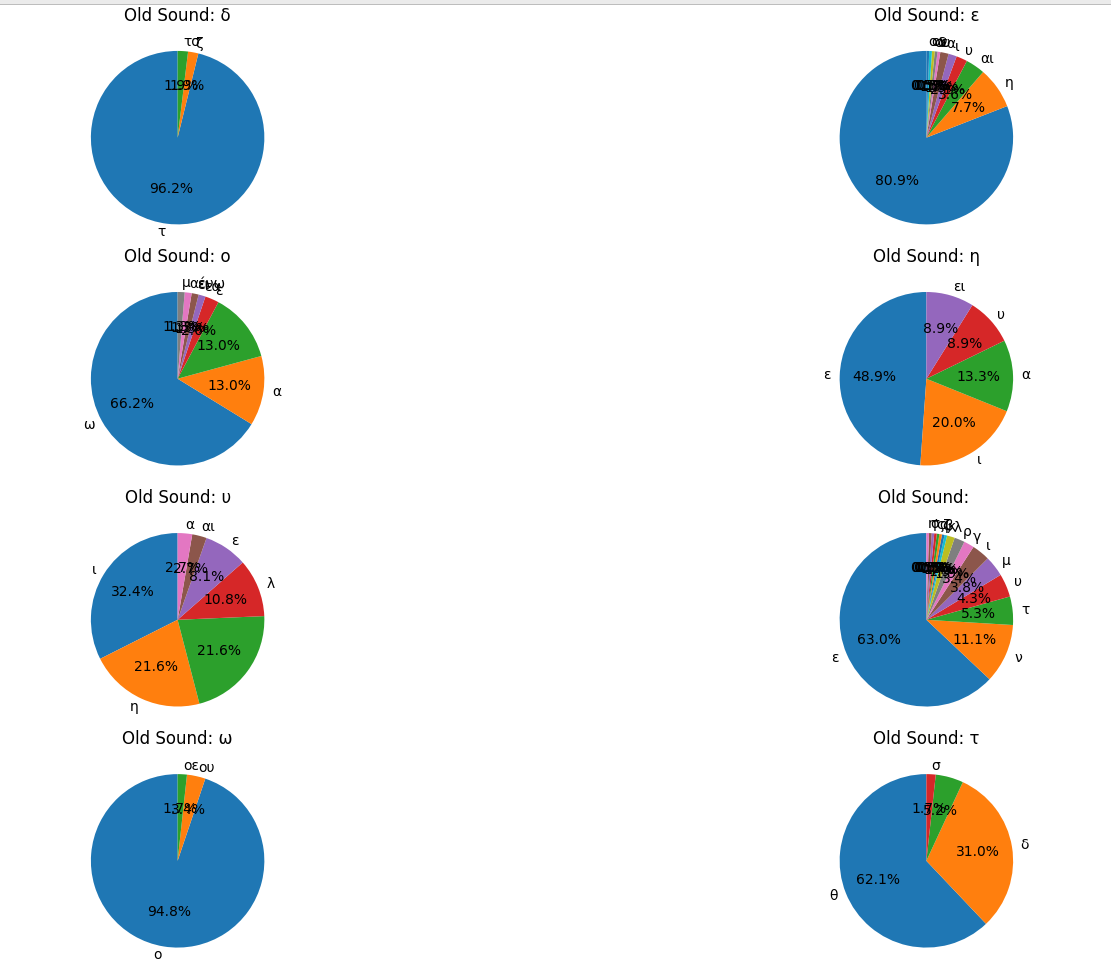

In [29]:
"""
import pandas as pd
import unicodedata
import difflib

# Normalisation pour enlever les diacritiques
def normalize_text(text):
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

# Fonction pour extraire les segments modifiés
def extract_changes_from_irregularities(irregularity_list):
    results = []
    for irregularity in irregularity_list:
        try:
            # Extraction de la "forme trouvée" et de la "forme correcte"
            found, correct = irregularity.split(': read ')
            found, correct = found.strip(), correct.strip()

            # Normalisation
            found = normalize_text(found)
            correct = normalize_text(correct)

            # Utilisation de difflib pour identifier les changements
            matcher = difflib.SequenceMatcher(None, found, correct)
            old_segment, new_segment = "", ""
            for tag, i1, i2, j1, j2 in matcher.get_opcodes():
                if tag != 'equal':  # Garder uniquement les segments modifiés
                    old_segment += found[i1:i2]
                    new_segment += correct[j1:j2]
            results.append((old_segment, new_segment))
        except ValueError:
            continue  # Ignorer les erreurs de parsing

    return results

"""
"""
# Exemple de contenu d'une ligne de 'Text Irregularities'
example_line = [
    'ἐνταγίου: read ἐνταγίῳ',
    'χωματεπίκτῃ: read χωματεπείκτῃ',
    'διαπίσματος: read διαπείσματος'
]

# Extraction des changements
changes = extract_changes_from_irregularities(example_line)
print(changes)  # Résultat attendu : [('ίου', 'ίῳ'), ('ίκτῃ', 'είκτῃ'), ('ίσματος', 'είσματος')]
"""

"""
# Appliquer la fonction sur les lignes non nulles
dataset_nettoye['Changes'] = dataset_nettoye['Text Irregularities'].apply(
    lambda x: extract_changes_from_irregularities(eval(x)) if pd.notnull(x) else []
)

# Affichage du DataFrame
print(dataset_nettoye[['Text Irregularities', 'Changes']])

# Créer un DataFrame avec les formes anciennes et nouvelles
sound_change_df = pd.DataFrame(changes.tolist(), columns=["old", "new"])
sound_change_df.dropna(inplace=True)
print(sound_change_df)
"""

                                   Text Irregularities  \
200                                                 []   
422                                                 []   
452                  ['ἐξπελλευτοὶ: read ἐξπελλευταὶ']   
473                                                 []   
294                ['προφερομενην: read προφερομένης']   
..                                                 ...   
413                                                 []   
521  ['ἡληκίᾳ: read ἡλικίᾳ', 'ἐξὼν: read ἐξὸν', 'ἐβ...   
202  ['ἀρβας: read ἀρ<τά>βας', 'ϊνδικτιονος: read ἰ...   
576                                                 []   
523                                                 []   

                                               Changes  
200                                                 []  
422                                                 []  
452                                           [(ο, α)]  
473                                                 []  
294               

In [60]:
# Créer un nouveau DataFrame nommé "sound_change_df" qui aura pour colonne "old" (forme correcte en grec classique) "new" (forme trouvée dans le papyrus) et remplissez le en lisant les erreurs relevées dans la colonne Irrtex Normalisez le texte en amont et enlevez les signes diacritiques
"""
import pandas as pd
import unicodedata
import difflib

# Normaliser les textes pour enlever les diacritiques
def normalize_text(text):
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

# Fonction pour extraire les segments modifiés
def extract_changes(irregularity):
    try:
        old, new = irregularity.split(': read ')  # Séparer les deux formes
        old, new = old.strip(), new.strip()
        matcher = difflib.SequenceMatcher(None, old, new)
        old_segment, new_segment = "", ""

        # Parcourir les différences détectées
        for tag, i1, i2, j1, j2 in matcher.get_opcodes():
            if tag != 'equal':  # Extraire uniquement les segments différents
                old_segment += old[i1:i2]
                new_segment += new[j1:j2]

        return old_segment, new_segment
    except ValueError:
        return None, None

# Appliquer sur la colonne "Text Irregularities"
dataset_nettoye['Text Irregularities Normalized'] = dataset_nettoye['Text Irregularities'].apply(normalize_text)
changes = dataset_nettoye['Text Irregularities Normalized'].dropna().apply(extract_changes)

# Créer un DataFrame avec les formes anciennes et nouvelles
sound_change_df = pd.DataFrame(changes.tolist(), columns=["old", "new"])
sound_change_df.dropna(inplace=True)
print(sound_change_df)

"""

"""
# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(fichier_csv)

# Appliquer sur la colonne "Text Irregularities"
df['Text Irregularities Normalized'] = df['Text Irregularities'].apply(normalize_text)
changes = df['Text Irregularities Normalized'].dropna().apply(extract_changes)

# Créer un DataFrame avec les formes anciennes et nouvelles
sound_change_df = pd.DataFrame(changes.tolist(), columns=["old", "new"])
sound_change_df.dropna(inplace=True)
print(sound_change_df)
"""

      old    new
2     ['ο    α']
4     ['ν    ς']
6      ['    ε']
14    ['ε    α']
16     ['    α']
..    ...    ...
428   ['ε     ']
432  ['αι    ε']
438   ['η   ει']
440   ['ω    ο']
441    ['  <ο>']

[86 rows x 2 columns]


'\n# Charger le fichier CSV dans un DataFrame\ndf = pd.read_csv(fichier_csv)\n\n# Appliquer sur la colonne "Text Irregularities"\ndf[\'Text Irregularities Normalized\'] = df[\'Text Irregularities\'].apply(normalize_text)\nchanges = df[\'Text Irregularities Normalized\'].dropna().apply(extract_changes)\n\n# Créer un DataFrame avec les formes anciennes et nouvelles\nsound_change_df = pd.DataFrame(changes.tolist(), columns=["old", "new"])\nsound_change_df.dropna(inplace=True)\nprint(sound_change_df)\n'

In [104]:
import pandas as pd
import unicodedata
import difflib
import string

# Normaliser les textes pour enlever les diacritiques
def normalize_text(text):
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

# Fonction pour extraire les segments modifiés
def extract_changes(irregularity):
    try:
        # Séparer les formes 'old' et 'new' sur ': read '
        old, new = irregularity.split(': read ')  # Séparer les deux formes
        old, new = old.strip(), new.strip()

        # Supprimer la ponctuation des deux segments
        translator = str.maketrans("", "", string.punctuation)
        old = old.translate(translator)
        new = new.translate(translator)

        # Utiliser difflib pour comparer les segments
        matcher = difflib.SequenceMatcher(None, old, new)
        old_segment, new_segment = "", ""

        # Parcourir les différences détectées et extraire les segments modifiés
        for tag, i1, i2, j1, j2 in matcher.get_opcodes():
            if tag != 'equal':  # Extraire uniquement les segments différents
                old_segment += old[i1:i2]
                new_segment += new[j1:j2]

        # Retourner des chaînes de caractères sans espace inutile
        return old_segment.strip(), new_segment.strip()

    except ValueError:
        return "", ""  # Si une erreur se produit, retourner des chaînes vides
"""
# Exemple d'utilisation : Appliquer sur la colonne "Text Irregularities"
dataset_nettoye['Text Irregularities Normalized'] = dataset_nettoye['Text Irregularities'].apply(normalize_text)

# Appliquer la fonction extract_changes sur la colonne nettoyée
changes = dataset_nettoye['Text Irregularities Normalized'].dropna().apply(extract_changes)

# Créer un DataFrame avec les formes anciennes et nouvelles
sound_change_df = pd.DataFrame(changes.tolist(), columns=["old", "new"])

# Nettoyer les valeurs NaN (si elles existent)
sound_change_df.dropna(inplace=True)

# Vérifier si le problème persiste
print(sound_change_df)
"""



# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('./papyrus_corpus.csv')

# Appliquer sur la colonne "Text Irregularities"
df['Text Irregularities Normalized'] = df['Text Irregularities'].apply(normalize_text)
changes = df['Text Irregularities Normalized'].dropna().apply(extract_changes)
#changes = df['Text Irregularities'].dropna().apply(extract_changes)

# Créer un DataFrame avec les formes anciennes et nouvelles
sound_change_df = pd.DataFrame(changes.tolist(), columns=["old", "new"])
sound_change_df.dropna(inplace=True)
print(sound_change_df)

    old new
0          
1          
2          
3          
4    θ’  τʼ
..   ..  ..
574        
575        
576        
577        
578        

[579 rows x 2 columns]


In [80]:
# Quels sont les 10 changements les plus fréquents ?

top_changes = sound_change_df.value_counts().head(10)
print("Top 10 des changements les plus fréquents :")
print(top_changes)


Top 10 des changements les plus fréquents :
old  new
            493
ε            11
     ε        9
ο    ω        5
ω    ο        3
ν             3
     ο        3
     υ        2
υ    ς        2
μ    σ        2
dtype: int64


In [105]:
# Quels graphèmes du grecs classiques ont été modifiés plus de 30 fois dans le dataset ?

grapheme_counts = sound_change_df['old'].value_counts()
frequent_graphemes = grapheme_counts[grapheme_counts > 30]
print("Graphèmes modifiés plus de 30 fois :")
print(frequent_graphemes)
# Ils s'agit du grapheme vide pour old qui représente une insertion dans le new

Graphèmes modifiés plus de 30 fois :
    520
Name: old, dtype: int64


In [77]:
print("Index du DataFrame :")
print(sound_change_df.index)

print("Les premières valeurs de 'old' :")
print(sound_change_df['old'].head())


Index du DataFrame :
RangeIndex(start=0, stop=579, step=1)
Les premières valeurs de 'old' :
0      
1      
2      
3      
4    θ’
Name: old, dtype: object


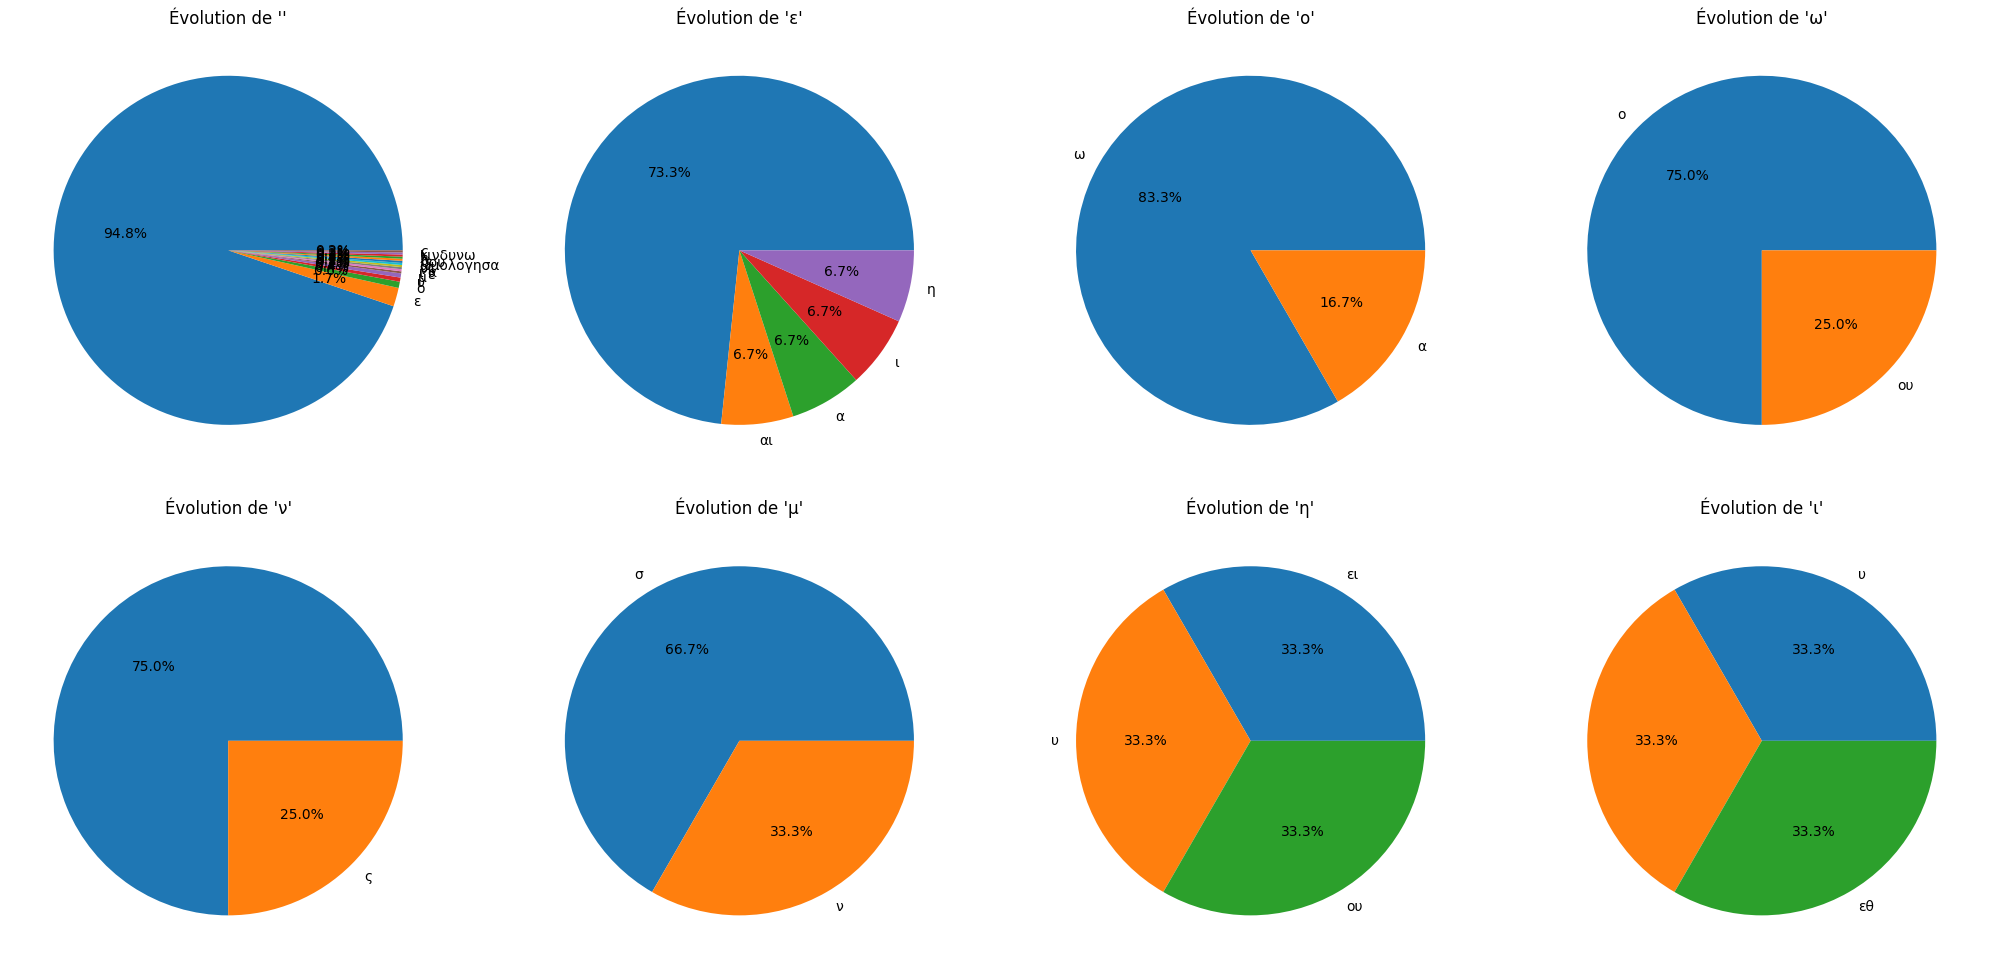

'\nimport matplotlib.pyplot as plt\n\n# Générer les pie charts\nfig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 lignes, 4 colonnes\n\n# Filtrer uniquement les graphèmes qui ont des correspondances\nvalid_graphemes = [\n    grapheme for grapheme in frequent_graphemes.index\n    if not sound_change_df[sound_change_df[\'old\'] == grapheme][\'new\'].empty\n]\n\nfor ax, grapheme in zip(axes.flatten(), valid_graphemes):\n    # Obtenir les nouvelles formes et leurs fréquences\n    new_forms = sound_change_df[sound_change_df[\'old\'] == grapheme][\'new\'].value_counts()\n    \n    if not new_forms.empty:  # Vérifier qu\'il y a des données\n        ax.pie(new_forms, labels=new_forms.index, autopct=\'%1.1f%%\')\n        ax.set_title(f"Évolution de \'{grapheme}\'")\n    else:\n        ax.axis(\'off\')  # Désactiver les axes pour les graphiques vides\n\n# Désactiver les axes inutilisés\nfor ax in axes.flatten()[len(valid_graphemes):]:\n    ax.axis(\'off\')\n\nplt.tight_layout()\nplt.show()\n

In [82]:
# Créer un graphique unique qui représente pour chacun de ces 8 graphèmes la nouvelle forme qu'il va prendre sous la forme d'un pie chart (utilisez les subplots de matplotlib)


import matplotlib.pyplot as plt

# Sélectionner les 8 graphèmes les plus fréquents
frequent_graphemes = grapheme_counts.head(8)

# Générer les pie charts
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 lignes, 4 colonnes

#for ax, grapheme in zip(axes.flatten(), sound_change_df['old']):
for ax, grapheme in zip(axes.flatten(), frequent_graphemes.index):
    new_forms = sound_change_df[sound_change_df['old'] == grapheme]['new'].value_counts()
    ax.pie(new_forms, labels=new_forms.index, autopct='%1.1f%%')
    ax.set_title(f"Évolution de '{grapheme}'")

plt.tight_layout()
plt.show()




"""
import matplotlib.pyplot as plt

# Générer les pie charts
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 lignes, 4 colonnes

# Filtrer uniquement les graphèmes qui ont des correspondances
valid_graphemes = [
    grapheme for grapheme in frequent_graphemes.index
    if not sound_change_df[sound_change_df['old'] == grapheme]['new'].empty
]

for ax, grapheme in zip(axes.flatten(), valid_graphemes):
    # Obtenir les nouvelles formes et leurs fréquences
    new_forms = sound_change_df[sound_change_df['old'] == grapheme]['new'].value_counts()
    
    if not new_forms.empty:  # Vérifier qu'il y a des données
        ax.pie(new_forms, labels=new_forms.index, autopct='%1.1f%%')
        ax.set_title(f"Évolution de '{grapheme}'")
    else:
        ax.axis('off')  # Désactiver les axes pour les graphiques vides

# Désactiver les axes inutilisés
for ax in axes.flatten()[len(valid_graphemes):]:
    ax.axis('off')

plt.tight_layout()
plt.show()
"""

BONUS : Représentez le graphe de conversion de sons (chaque noeud représente un son, le poids d'une arrete le nombre de changements constatés dans le corpus) (utilisez par exemple networkx ou pyvis)

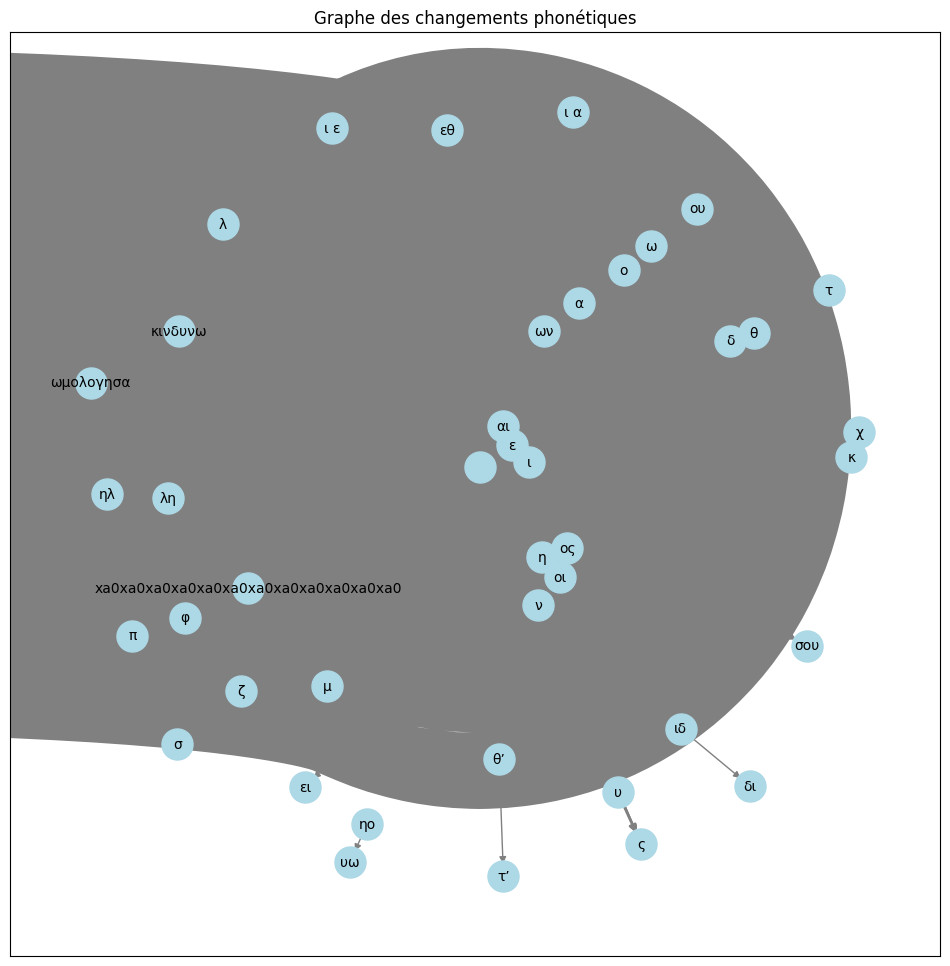

In [102]:
import networkx as nx

# Construire le graphe
G = nx.DiGraph()
for _, row in sound_change_df.iterrows():
    G.add_edge(row['old'], row['new'], weight=G.get_edge_data(row['old'], row['new'], default={'weight': 0})['weight'] + 1)

# Dessiner le graphe avec des tailles de nœuds et épaisseurs d'arêtes pondérées
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=weights, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Graphe des changements phonétiques")
plt.show()


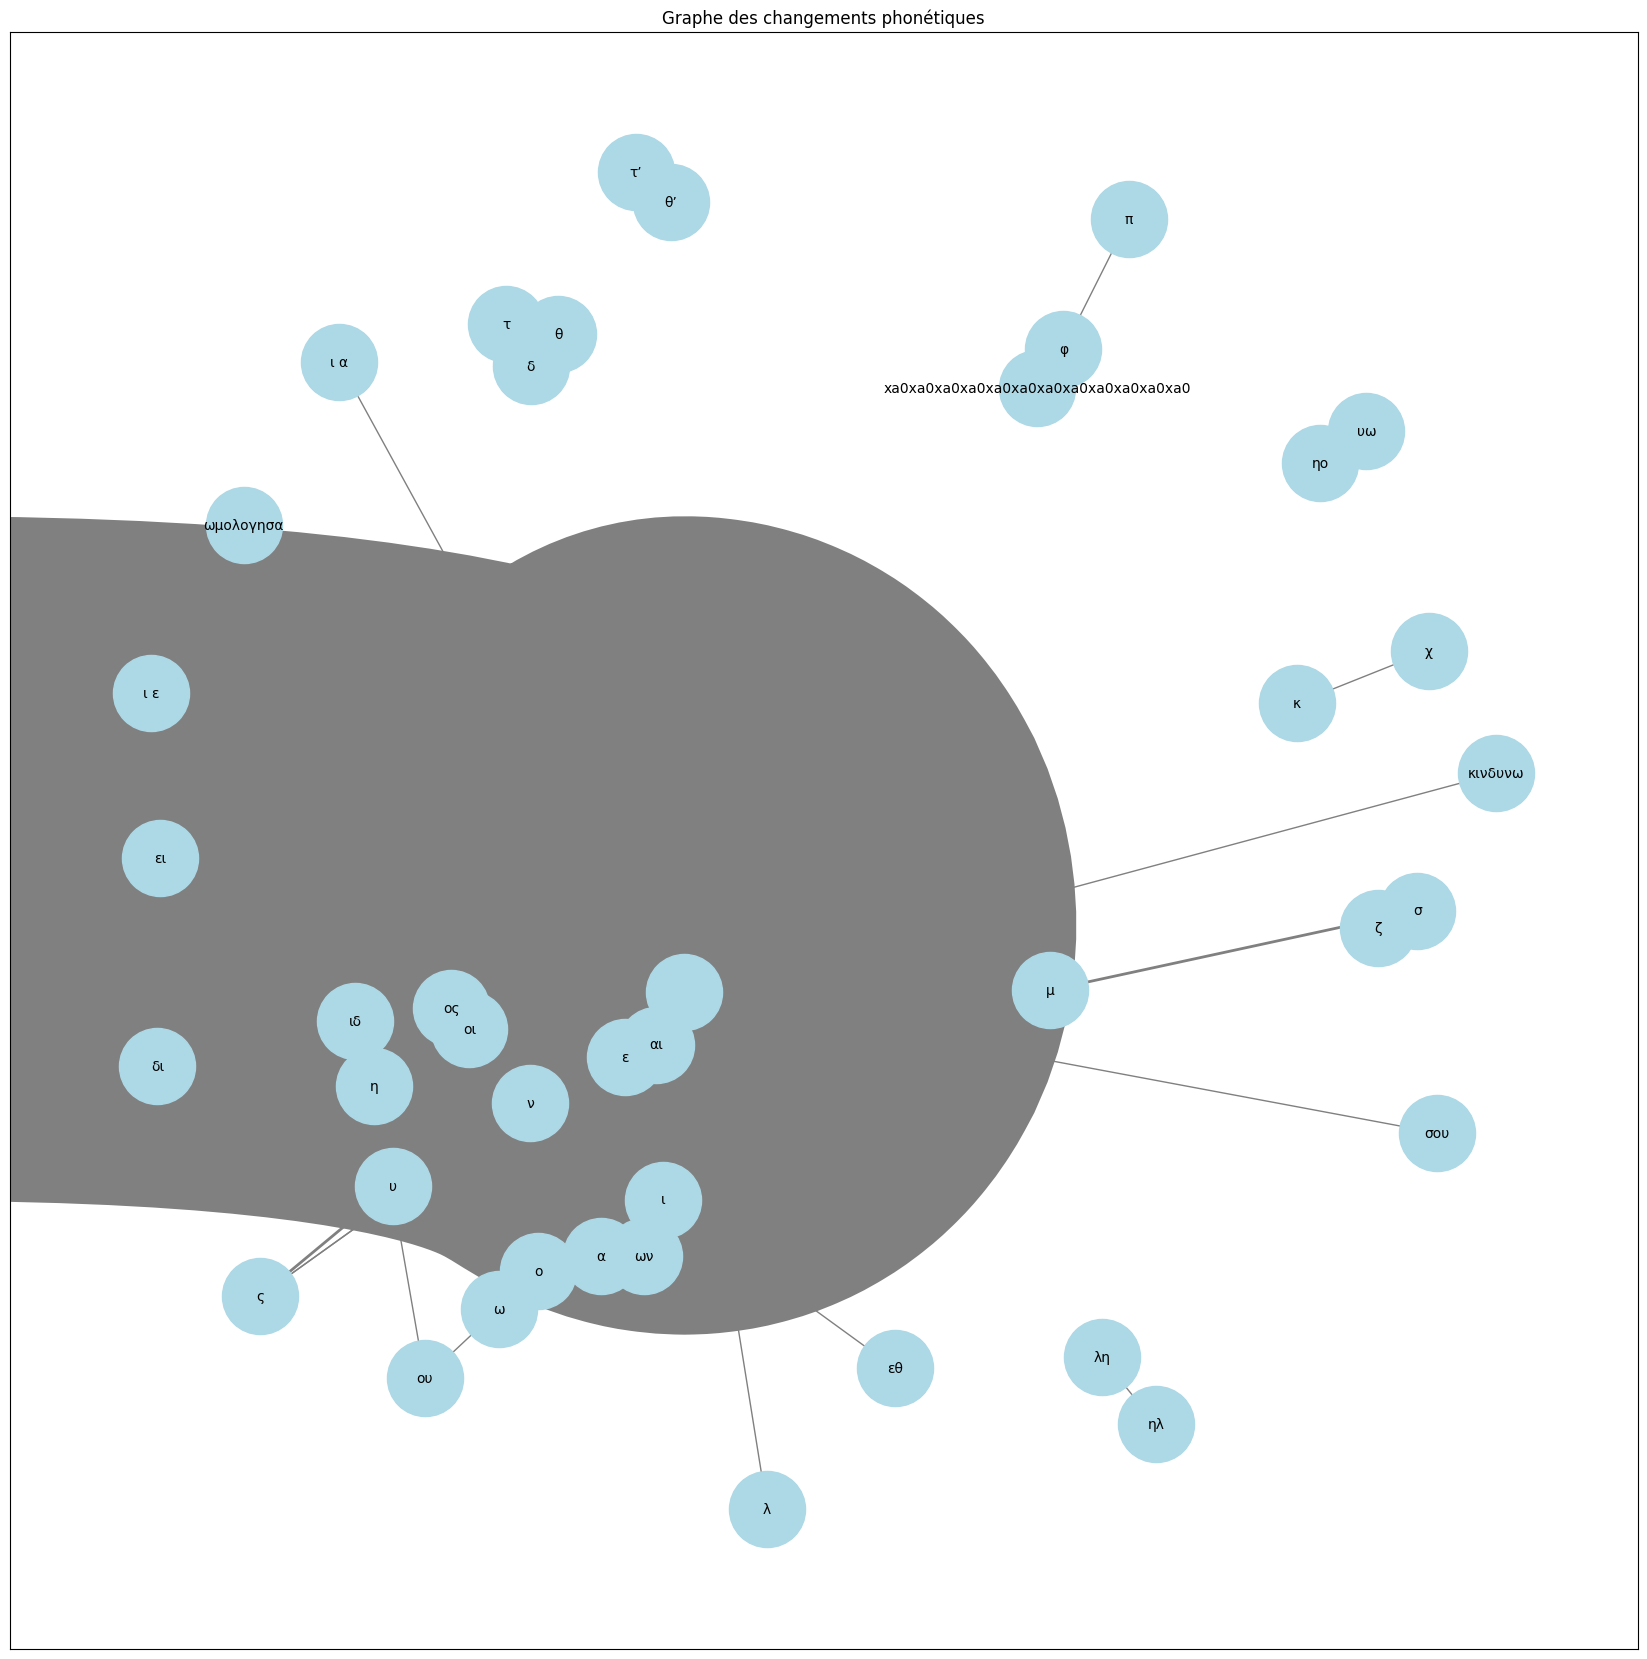

In [ ]:
import networkx as nx

# Construire le graphe
G = nx.DiGraph()
for _, row in sound_change_df.iterrows():
    G.add_edge(row['old'], row['new'], weight=G.get_edge_data(row['old'], row['new'], default={'weight': 0})['weight'] + 1)

# Dessiner le graphe avec des tailles de nœuds et épaisseurs d'arêtes pondérées
plt.figure(figsize=(21, 21))
pos = nx.spring_layout(G)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=weights, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Graphe des changements phonétiques")
plt.show()


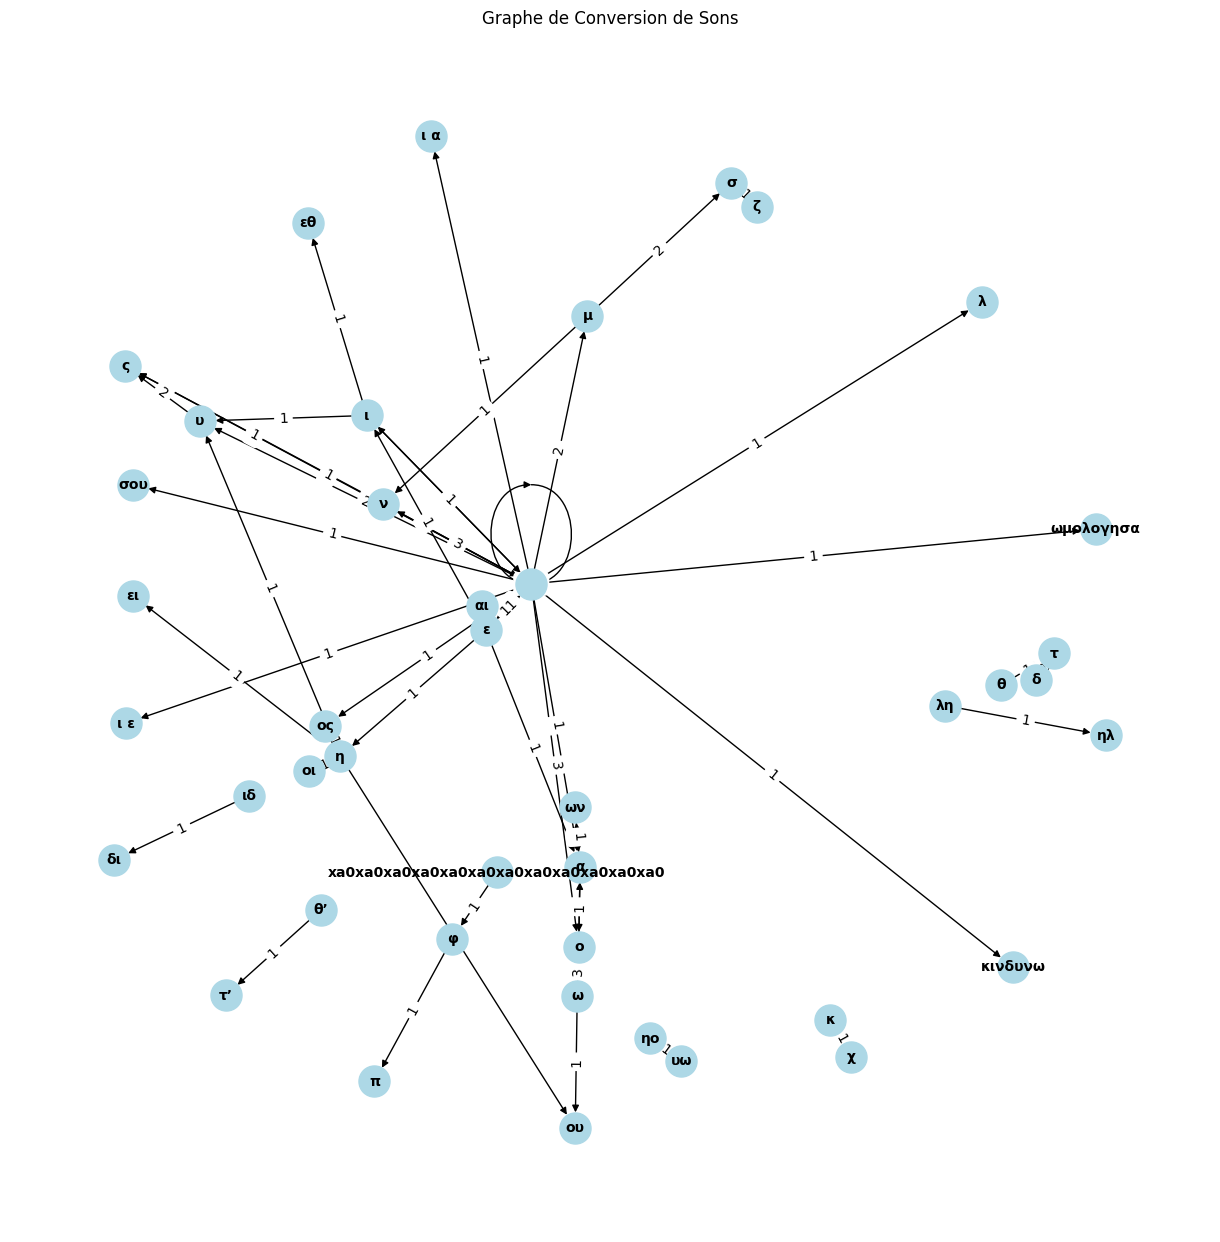

In [103]:
import networkx as nx
import matplotlib.pyplot as plt

# Créer un graphe dirigé
G = nx.DiGraph()

# Ajouter les arêtes au graphe en fonction des changements dans le corpus
for _, row in sound_change_df.iterrows():
    old_sound = row['old']
    new_sound = row['new']
    
    # Ajouter les arêtes avec un poids égal à 1 (au cas où l'arête n'existerait pas encore)
    if G.has_edge(old_sound, new_sound):
        G[old_sound][new_sound]['weight'] += 1  # Si l'arête existe, on incrémente le poids
    else:
        G.add_edge(old_sound, new_sound, weight=1)  # Si l'arête n'existe pas, on la crée avec un poids de 1

# Visualisation du graphe avec NetworkX
plt.figure(figsize=(12, 12))

# Poser les nœuds (disposition)
pos = nx.spring_layout(G, seed=42)  # Pour une disposition claire des nœuds

# Dessiner le graphe
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

#weights = [G[u][v]['weight'] for u, v in G.edges()]
# Ajouter les étiquettes des poids sur les arêtes
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
#nx.draw_networkx_edges(G, pos, width=weights, edge_color="gray")

# Afficher le graphe
plt.title("Graphe de Conversion de Sons")
plt.show()


In [89]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 19.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [91]:
from pyvis.network import Network

# Créer un objet pyvis pour le graphe
net = Network()

# Ajouter les nœuds et les arêtes
for _, row in sound_change_df.iterrows():
    old_sound = row['old']
    new_sound = row['new']
    
    # Ajouter les nœuds
    if old_sound not in net.nodes:
        net.add_node(old_sound, label=old_sound)
    if new_sound not in net.nodes:
        net.add_node(new_sound, label=new_sound)
    
    # Ajouter une arête avec un poids
    net.add_edge(old_sound, new_sound, weight=1)

# Afficher le graphe interactif
net.show("sound_changes.html", notebook=False)



sound_changes.html


# Transition

Quelles sont les colonnes du df ? Eliminez toutes celles qui vous paraissent inutiles et sauvez cela dans un fichier nommé "clean_papyrus-corpus.csv"
C'est ce fichier qui servira de base d'affichage du front de l'application que vous allez construire

In [106]:
# Inspecter les colonnes existantes
print(dataset_nettoye.columns)

Index(['ID', 'Authors / works', 'Book form', 'Content (beta!)',
       'Culture & genre', 'Date', 'Full Text', 'Language/script', 'Material',
       'Note', 'People List', 'Places List', 'Provenance', 'Recto/Verso',
       'Reuse note', 'Reuse type', 'Ro', 'Text Irregularities', 'Genre',
       'Ville', 'formatted_dates', 'Uncertain Portion', 'People Ugarit',
       'Places Ugarit', 'Other Ugarit', 'Changes',
       'Text Irregularities Normalized'],
      dtype='object')


In [113]:
# Sélectionner les colonnes à garder
columns_to_keep = ['ID', 'Date', 'Full Text', 'People List', 'Places List', 'Provenance', 'Text Irregularities', 'Ville', 'formatted_dates']  # Remplacez par les colonnes utiles

# Créer un DataFrame avec uniquement les colonnes à garder
clean_df = dataset_nettoye[columns_to_keep]


# Renommer la colonne d'index
#clean_df.index.name = 'Index'  # Remplacez 'ID' par le nom que vous souhaitez donner



# Sauvegarder le DataFrame nettoyé dans un fichier CSV
#clean_df.to_csv("clean_papyrus-corpus.csv", index=True)
clean_df.to_csv("clean_papyrus-corpus.csv", index=False)

# Afficher un aperçu du DataFrame nettoyé
print(clean_df.head())


              ID                                               Date  \
Index                                                                 
200    TM 112497                       6th century AD: AD 500 - 599   
422    TM 129806  year 26 of Iustinianus ?: AD 551 Aug 30 - 552 ...   
452     TM 15336                                       aboutAD 565?   
473     TM 15337                                     AD 566 Feb 22?   
294     TM 15338                                     AD 531 May 22?   

                                               Full Text  \
Index                                                      
200    -------------------- ---.--- ---.τῆς τοῦ χρυσί...   
422    -------------------- .......... ..ουτα ε̣ὐ̣χα̣...   
452    -------------------- --- τῆς τάξεως τῆς ὑμετέρ...   
473    Κωνσταντῖνος Καλλινίκου σιγγουλάριος τῷ ἀδελφῷ...   
294    ---slanting-strokeμετὰ τὴν ὑπατείαν Φλαυίων Ὀρ...   

                                             People List  \
Index                

# III) Présenter le corpus /4

L'objectif de cette partie est de vous familiariser avec Streamlit https://streamlit.io/
Une librairie très intuitive pour construire en peu de lignes de codes une pseudo page web.

Lisez la documentation et les tutoriels  pour pouvoir suivre les consignes et construire l'application https://streamlit.io/components

L'ensemble de l'application doit être stockée dans un fichier unique nommé streamlit_papyrus.py et pouvoir tourner sans erreur au lancement de la commande
"streamlit run streamlit_papyrus.py"

# 9) Création de l'application présentant les papyrus

En utilisant les composants streamlit adaptés, créez:

* Sur la page principal, le titre de l'application ("La Chasse aux Papyrus"), une image de votre choix, ainsi qu'une description de l'application
* Dans la barre à gauche, créez un menu déroulant permettant de choisir un papyrus parmi tous ceux de la collection
* Si un papyrus est sélectionné, les informations principales le concernant sont affichées sur la page centrale
(numéro dans la collection en haut centré
, Date, Provenance, Personnes, Lieux et Textual Irregularities (utilisez le système de colones et composants pour les présenter sous la forme clé / valeur)
* Il y a vraiment beaucoup de papyri à choisir ! Pour simplifier la sélection, donnez l'option de mettre des filtres sur la provenance et  la date de découverte (selectbox pour le lieu, slider pour la date) dont la manipulation va limiter le nombre de papyrus potentiellement sélectionnable

# 10) enrichissement des données

Le but est d'approfondir sa connaissance de streamlit
* Faites en sorte que quand on clique sur un nom de lieu ou de personne on fasse apparaître la liste des papyri dans lesquels il apparaît
* Faites apparaître les corrections de la colonne Text Irregularities dans le texte sous forme d'annotation textuelle streamlit

*Ajoutez une fonctionnalité supplémentaire à l'application.
* Expliquez son intêrét et comment vous l'avez codé




### Fonctionnalité supplémentaire ajoutée : Recherche par mot-clé dans le texte des papyri

#### Ajouter une barre de recherche permettant à l'utilisateur d'entrer un mot ou une phrase. L'application affichera alors tous les papyri contenant ce mot ou cette phrase dans leur contenu complet (Full Text).

#### Intérêt de la fonctionnalité

    Exploration ciblée : Permet à l'utilisateur de trouver rapidement les papyri pertinents à partir d'un mot ou d'une idée précise.
    Analyse linguistique : Utile pour étudier des occurrences spécifiques, comme des mots rares, des expressions idiomatiques ou des noms.
    Enrichissement de l'application : Donne une dimension d'analyse personnalisée en rendant la collection plus interactive et exploitable.
    
#### Comment c'est codé

Voici les étapes :

    Ajoutez un champ de recherche (st.text_input) pour entrer le mot-clé.
    Filtrez les papyri dont la colonne Full Text contient ce mot ou cette phrase (en insensible à la casse).
    Affichez la liste des papyri correspondants avec leurs métadonnées principales.
    Affichez un extrait du texte pour chaque papyrus trouvé, avec le mot-clé mis en évidence.
    
    
#### Explications du code

    Champ de recherche :  
    search_query = st.sidebar.text_input("Entrez un mot ou une phrase à rechercher :", "")
    Ce champ dans la barre latérale permet à l'utilisateur d'entrer un mot ou une phrase.
    
    Filtrage des papyri :
    filtered_papyri = data[data['Full Text'].str.contains(search_query, case=False, na=False)]
    Vérifie si search_query est présent dans Full Text (insensible à la casse, gestion des valeurs manquantes).
    
    Mise en surbrillance :
    highlighted_text = re.sub(
    f"({re.escape(search_query)})",
    r"**\1**",
    full_text,
    flags=re.IGNORECASE
    )
    Utilise une expression régulière pour entourer le mot-clé trouvé de **, ce qui est interprété par Streamlit comme du texte en gras (Markdown).

    Affichage des résultats :
    Montre les métadonnées principales et un extrait (limité à 500 caractères) pour chaque papyrus trouvé.
    
   
#### Exemple d'utilisation

    L'utilisateur entre "δέδωκεν" dans la barre de recherche.
    L'application affiche tous les papyri contenant ce mot avec :
        Leur ID.
        La date et provenance.
        Un extrait de texte avec le mot mis en surbrillance.
    En cas d'absence de résultat, un message indique qu'aucun texte ne correspond.
    Si on veut voir l'un de ces papyry, il suffit d'aller le chercher dans la barre de papyry ou d'y rentrer directement son ID dans cette même barre.
    
    
#### Résultat attendu

    Un nouvel onglet interactif qui enrichit considérablement l'expérience utilisateur, en rendant la collection de papyri plus accessible et intuitive à explorer ! 

# BONUS HARDCORE (/2 points) :

Affichez les lieux mentionnés dans les papyri sur une carte